# Leads X Education

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('Leads X Education.csv')
ds.head(10)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673  Landing Page Submission   
7  20ef72a2-fb3b-45e0-924e-551c5fa59095       660664                      API   
8  cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624  Landing Page Submission   
9  af465dfc-7204-4130-9e05-33231863c4b5       660616                      API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   
5      Olark Chat           No          No          0          0.0   
6          Google           No          No          1          2.0   
7      Olark Chat           No          No          0          0.0   
8  Direct Traffic           No          No          0          2.0   
9          Google           No          No          0          4.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   
5                            0                   0.0  Olark Chat Conversation   
6                         1640                   2.0             Email Opened   
7                            0                   0.0  Olark Chat Conversation   
8                           71                   2.0             Email Opened   
9                           58                   4.0             Email Opened   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   
5     NaN                      NaN                                NaN   
6   India  Supply Chain Management                      Online Search   
7     NaN                      NaN                                NaN   
8   India   IT Projects Management                                NaN   
9   India       Finance Management                      Word Of Mouth   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   
5                             NaN   
6                      Unemployed   
7                             NaN   
8                             NaN   
9                             NaN   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No      

In [3]:
ds.shape

(9240, 37)

In [4]:
ds.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
ds.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

        ds[feature] = ds[feature].apply(lambda x : 1 if x=='Yes' else 0)
ds.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [8]:
#checking for duplicate Leads in Prospect ID column
sum(ds.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
#checking for duplicate in lead number column
sum(ds.duplicated(subset = 'Lead Number')) == 0

True

In [10]:
#dropping the Lead Number and Prospect ID columns as they do not add any values in the data set.

ds.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [11]:
ds.shape

(9240, 35)

In [12]:
ds.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
ds = ds.replace('Select', np.nan)

In [14]:
ds.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
#checking for the % of missing values.

round(100*(ds.isnull().sum())/len(ds.index), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

<AxesSubplot:>

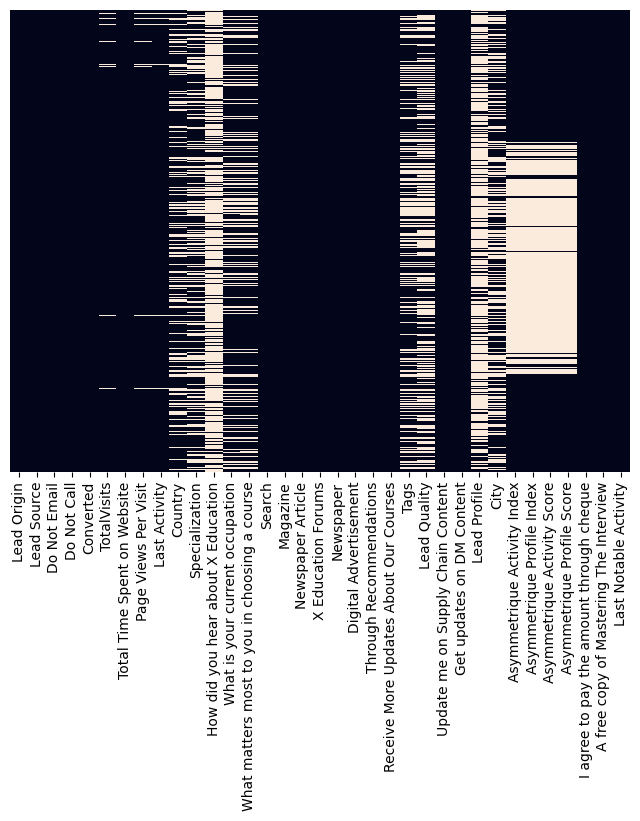

In [16]:
#seeing missing value via visualization
plt.figure(figsize=(8, 6))
sns.heatmap(ds.isnull(),yticklabels=False, cbar=False)

In [17]:
#dropping the columns with more than 40% missing values

cols_drop = ds.columns
for i in cols_drop:
    if ((100*(ds[i].isnull().sum()/len(ds.index))) > 40):
        ds.drop(i, 1, inplace = True)

In [18]:
ds.shape

(9240, 28)

<AxesSubplot:>

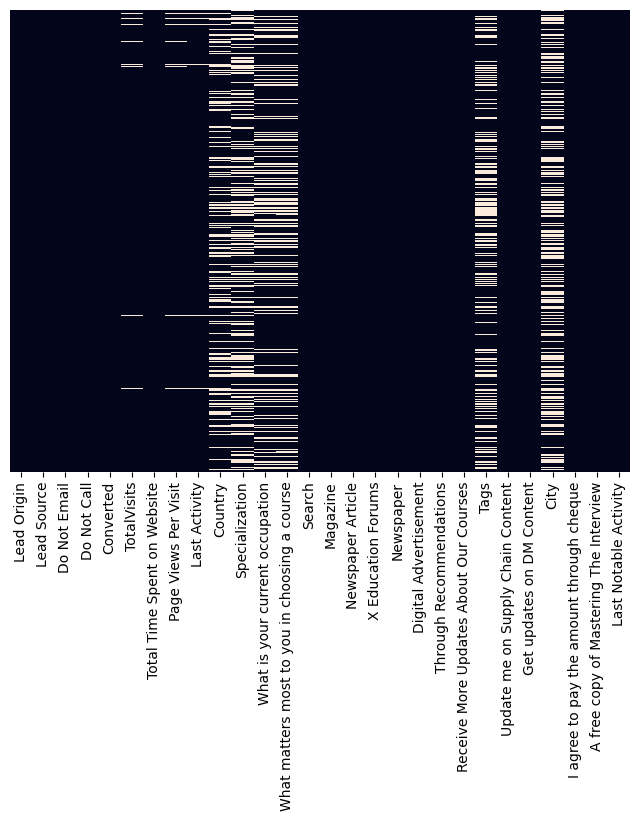

In [19]:
#seeing missing value via visualization after droping the columns more than 40% missing values
plt.figure(figsize=(8, 6))
sns.heatmap(ds.isnull(),yticklabels=False, cbar=False)

In [20]:
df=pd.DataFrame(ds)
df.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                      NaN   
1             Email Opened   India                      NaN   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                      NaN   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags  Update me on Supply Chain Content  \
0          Interested in other courses                                  0   
1                              Ringing                                  0   
2  Will revert after reading the email                                  0   
3                              Ringing                                  0   
4  Will revert after reading the email                                  0   

   Get updates on DM Content    City  \
0                          0     NaN   
1                          0     NaN   
2                          0  Mumbai   
3                          0  Mumbai   
4                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2  

In [21]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
# Replacing columns name

df.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)
df.rename(columns={'What matters most to you in choosing a course': 'Choice of Course'}, inplace=True)
df.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)
df.rename(columns={'Receive More Updates About Our Courses': 'Updates About Course'}, inplace=True)
df.rename(columns={'Update me on Supply Chain Content': 'Updateon Supply Chain'}, inplace=True)
df.rename(columns={'I agree to pay the amount through cheque': 'Payment through Cheque'}, inplace=True)
df.rename(columns={'A free copy of Mastering The Interview': 'Copy of Mastering Interview'}, inplace=True)

In [23]:
#Printing the object datatypes and their unique values

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('************************************************************************')
        print('\n')

Lead Origin:['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
************************************************************************


Lead Source:['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2


In [24]:
#checking missing values percentage in remaining columns after dropping more than 40% missing value columns

round(100*(df.isnull().sum())/len(df.index), 2)

Lead Origin                     0.00
Lead Source                     0.39
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     1.48
Total Time Spent on Website     0.00
Page Views Per Visit            1.48
Last Activity                   1.11
Country                        26.63
Specialization                 36.58
Occupation                     29.11
Choice of Course               29.32
Search                          0.00
Magazine                        0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
Updates About Course            0.00
Tags                           36.29
Updateon Supply Chain           0.00
Get updates on DM Content       0.00
City                           39.71
Payment through Cheque          0.00
Copy of Mastering Interview     0.00
L

In [25]:
# Replacing the null values with Mean/mode/most_frequent occuring values with the help of Simple Imputer
from sklearn.impute import SimpleImputer

# Replacing null value in Country column
imp=SimpleImputer(strategy="most_frequent")
df['Country']=imp.fit_transform(df['Country'].values.reshape(-1, 1))

# Replacing null value in Country column
imp=SimpleImputer(strategy="most_frequent")
df['Lead Source']=imp.fit_transform(df['Lead Source'].values.reshape(-1, 1))

# Replacing null value in Specialization column
imp=SimpleImputer(strategy="most_frequent")
df['Specialization']=imp.fit_transform(df['Specialization'].values.reshape(-1, 1))

# Replacing null value in Occupation column
imp=SimpleImputer(strategy="most_frequent")
df['Occupation']=imp.fit_transform(df['Occupation'].values.reshape(-1, 1))

# Replacing null value in Choice of Course column
imp=SimpleImputer(strategy="most_frequent")
df['Choice of Course']=imp.fit_transform(df['Choice of Course'].values.reshape(-1, 1))

# Replacing null value in Tags column
imp=SimpleImputer(strategy="most_frequent")
df['Tags']=imp.fit_transform(df['Tags'].values.reshape(-1, 1))

# Replacing null value in City column
imp=SimpleImputer(strategy="most_frequent")
df['City']=imp.fit_transform(df['City'].values.reshape(-1, 1))

# Replacing null value in Last Activity column
imp=SimpleImputer(strategy="most_frequent")
df['Last Activity']=imp.fit_transform(df['Last Activity'].values.reshape(-1, 1))

# Replacing null value in TotalVisits column
imp=SimpleImputer(strategy="mean")
df['TotalVisits']=imp.fit_transform(df['TotalVisits'].values.reshape(-1, 1))

# Replacing null value in Total Time Spent on Website column
imp=SimpleImputer(strategy="mean")
df['Total Time Spent on Website']=imp.fit_transform(df['Total Time Spent on Website'].values.reshape(-1, 1))

# Replacing null value in Page Views Per Visit on Website column
imp=SimpleImputer(strategy="mean")
df['Page Views Per Visit']=imp.fit_transform(df['Page Views Per Visit'].values.reshape(-1, 1))


<AxesSubplot:>

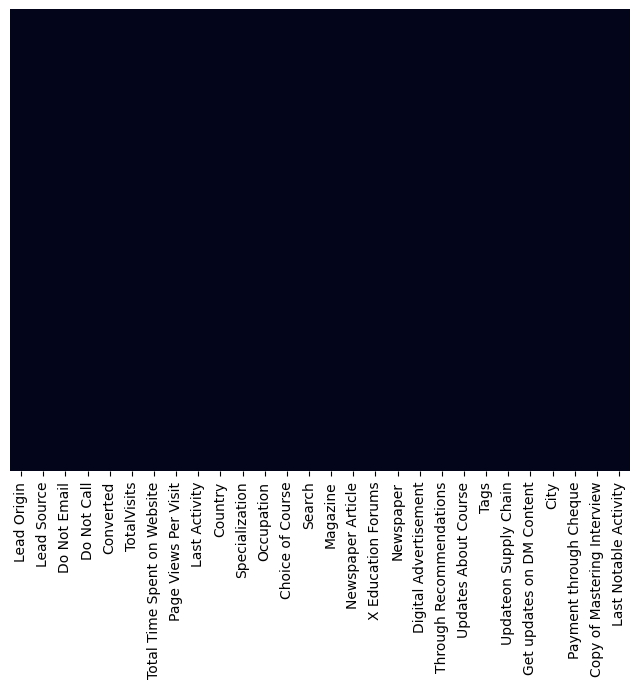

In [26]:
#seeing missing value via visualization after droping the columns more than 40% missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

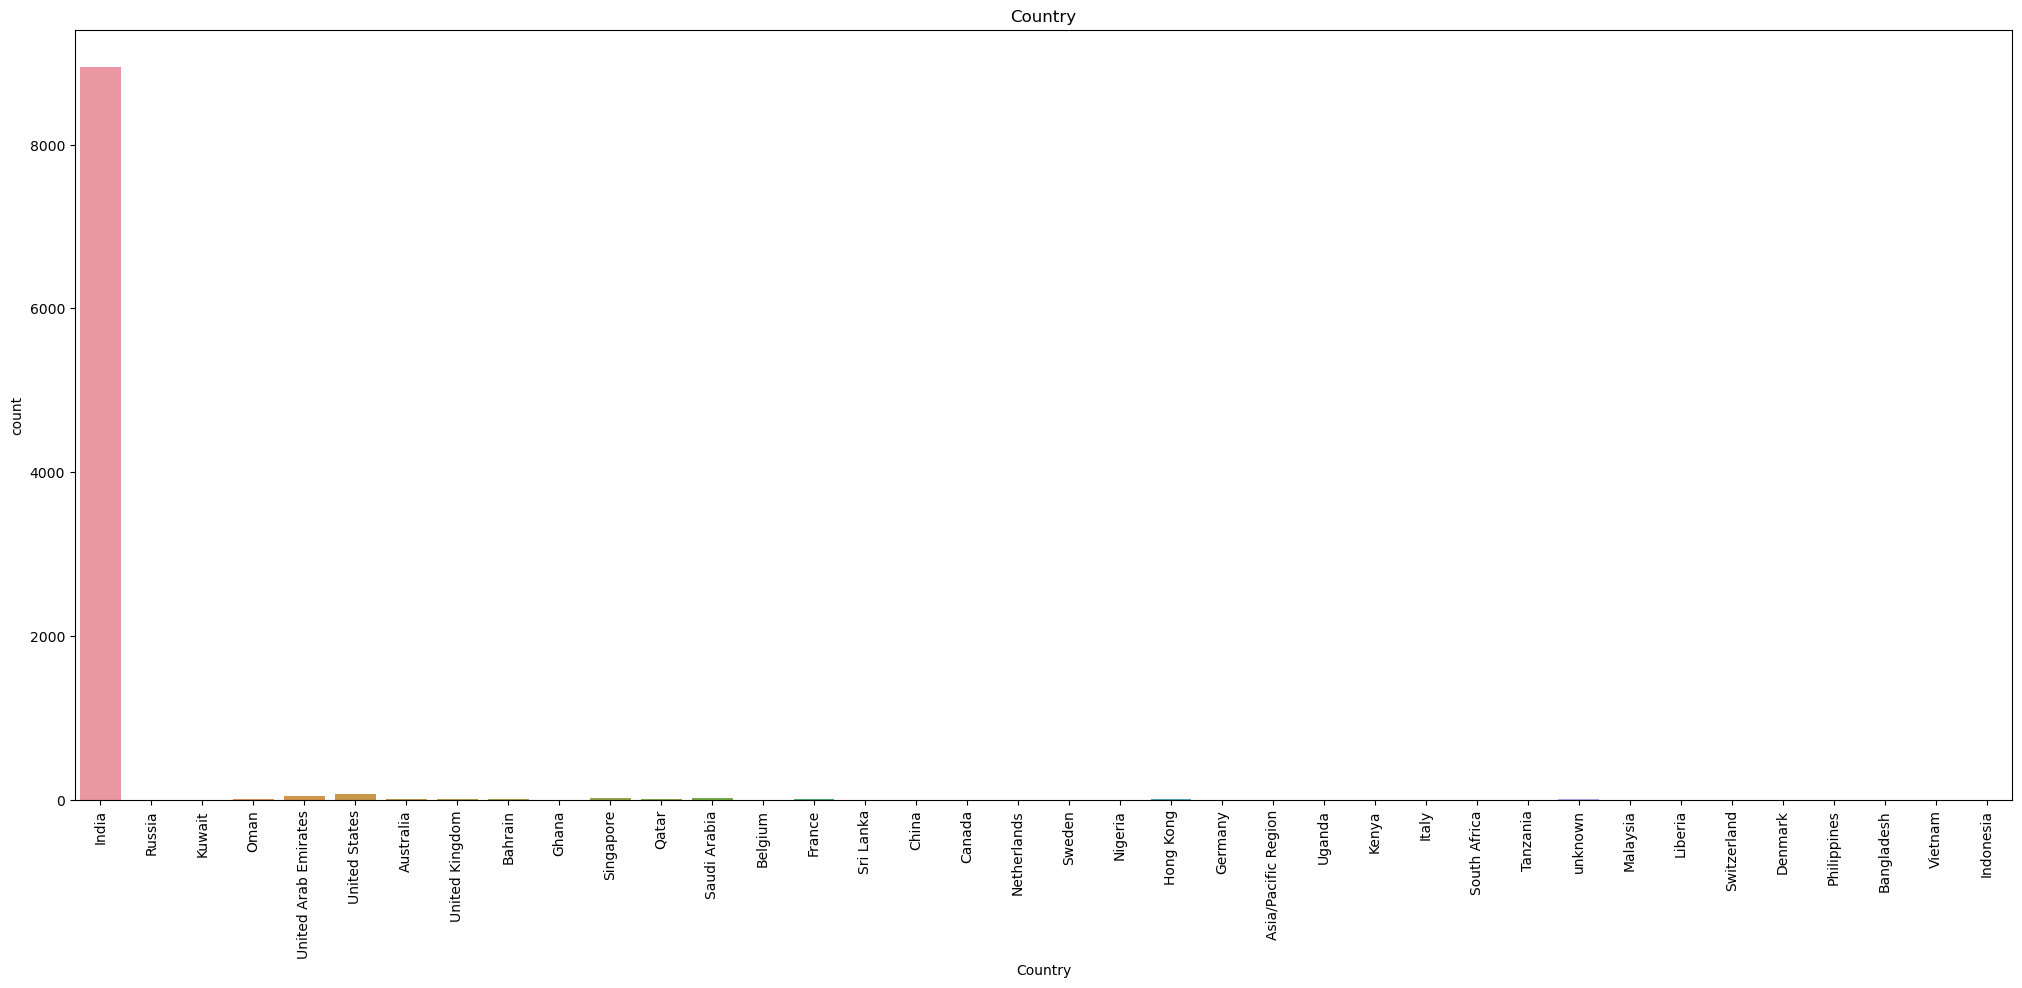

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [27]:
# Graphical representation of "Country" column

plt.subplots(figsize=(25, 10))
sns.countplot(df['Country'])
plt.title("Country")
plt.xticks(rotation=90)
plt.show()

print(df['Country'].value_counts())

In [28]:
#As per above image the Country column is highly skewed so the column must to be droppped from "country"

cols_drop=['Country']

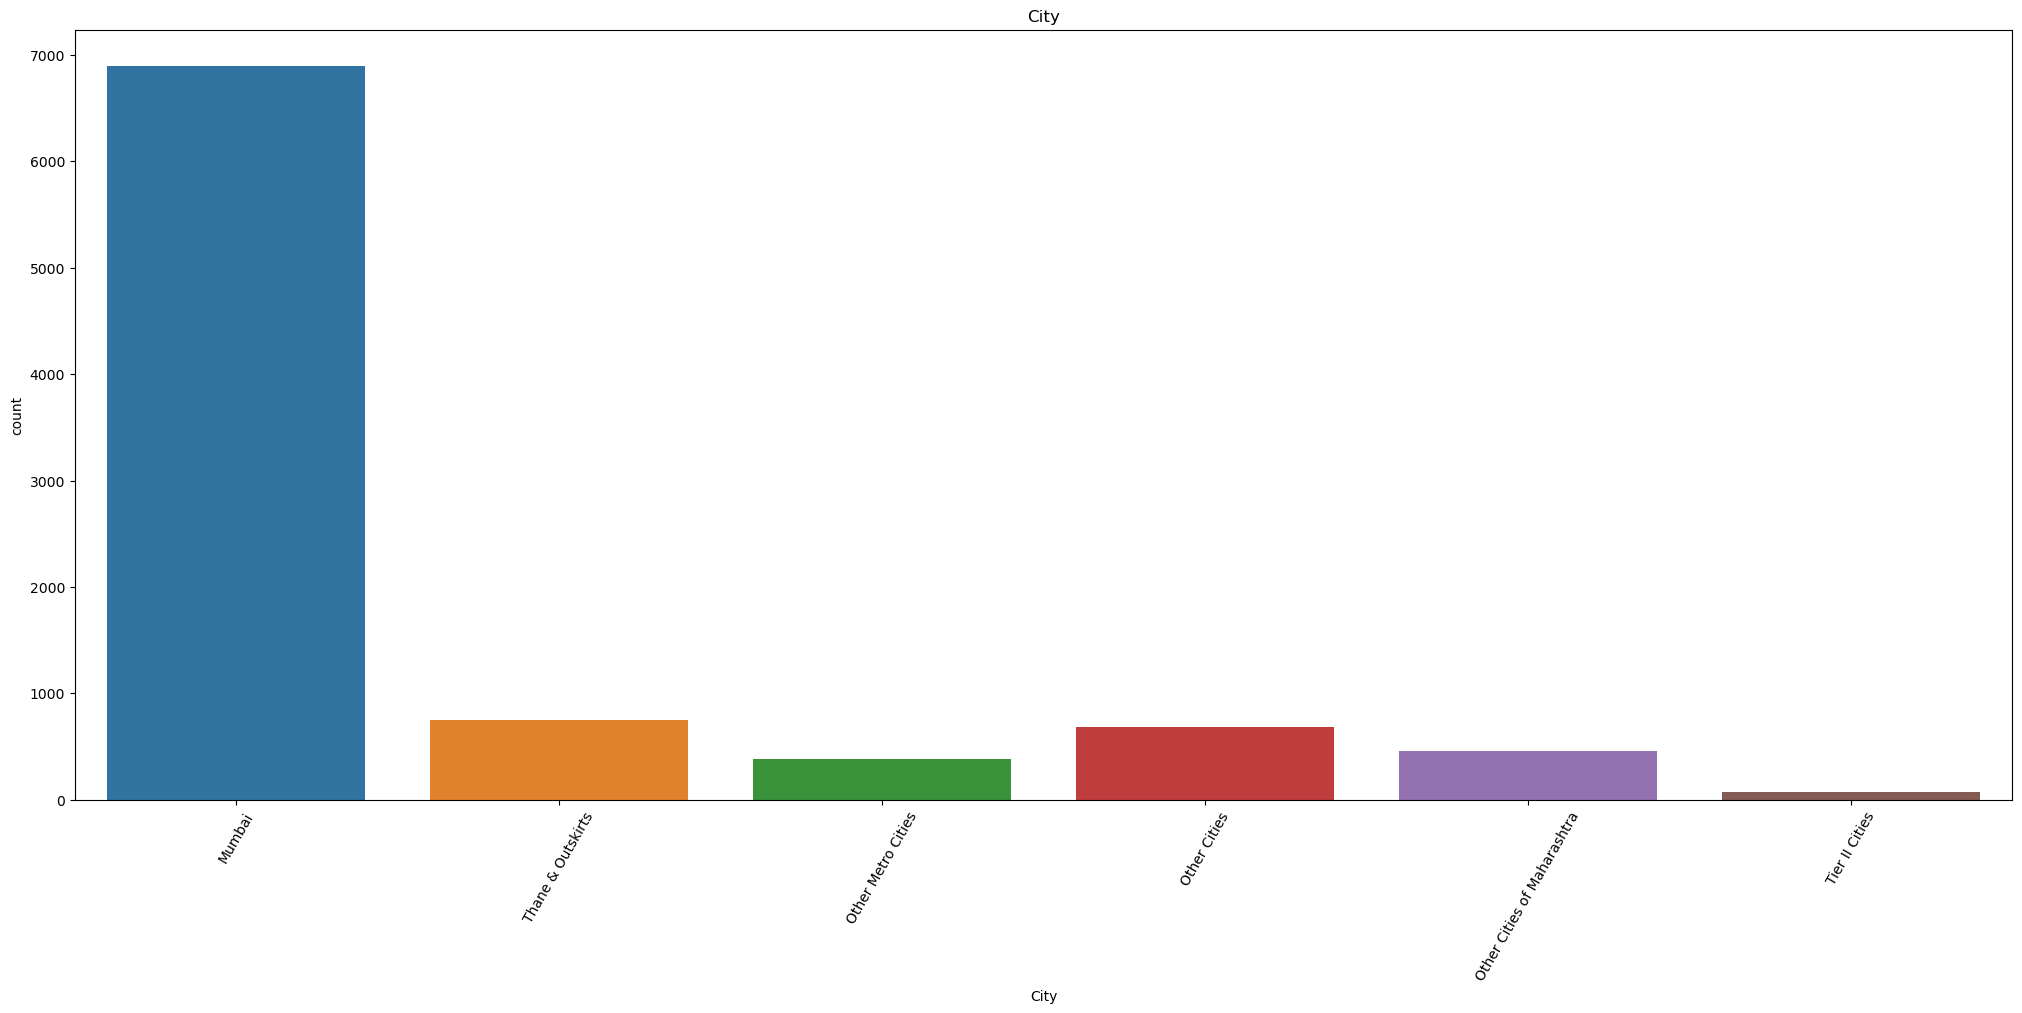

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


In [29]:
# Graphical representation of "City" column

plt.subplots(figsize=(25, 10))
sns.countplot(df['City'])
plt.title("City")
plt.xticks(rotation=60)
plt.show()

print(df['City'].value_counts(dropna=False))

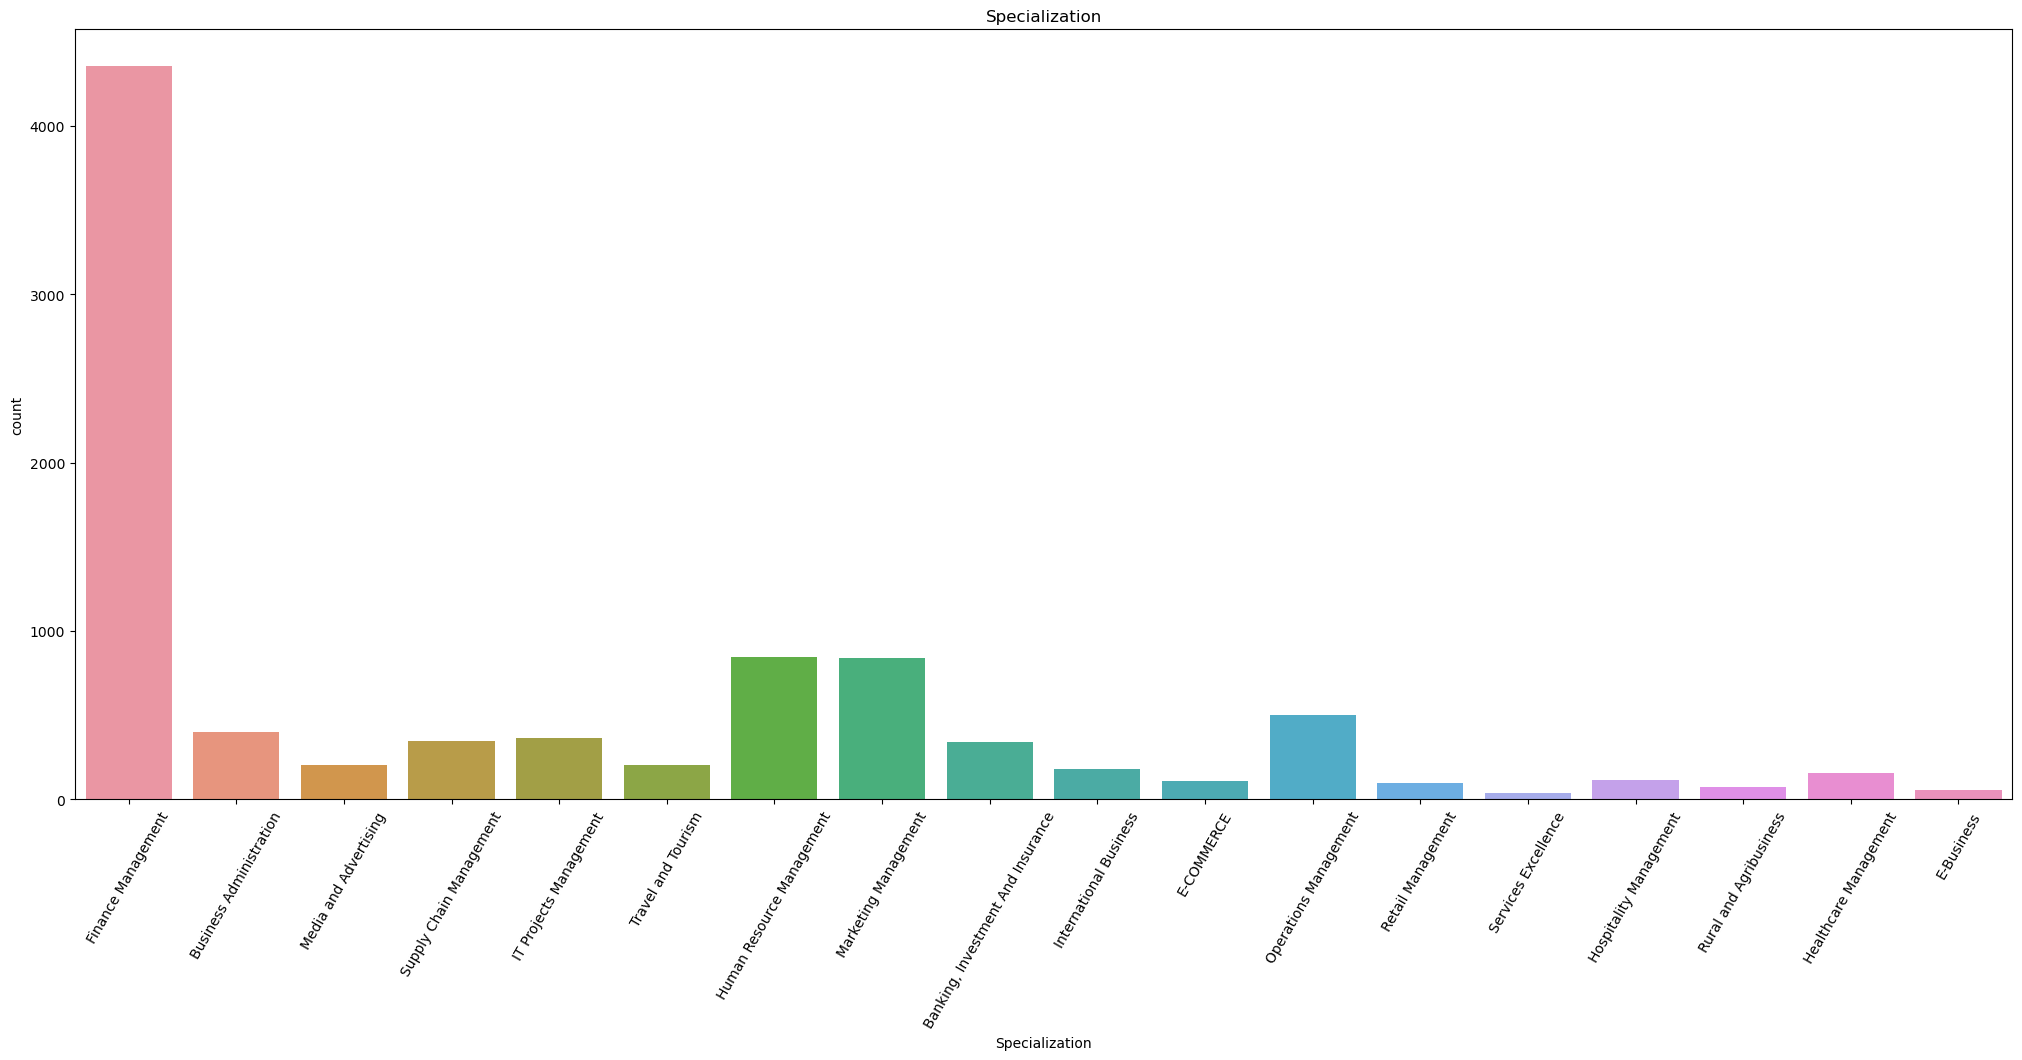

Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [30]:
# Graphical representation of "Specialization" column

plt.subplots(figsize=(25, 10))
sns.countplot(df['Specialization'])
plt.title("Specialization")
plt.xticks(rotation=60)
plt.show()

print(df['Specialization'].value_counts(dropna=False))

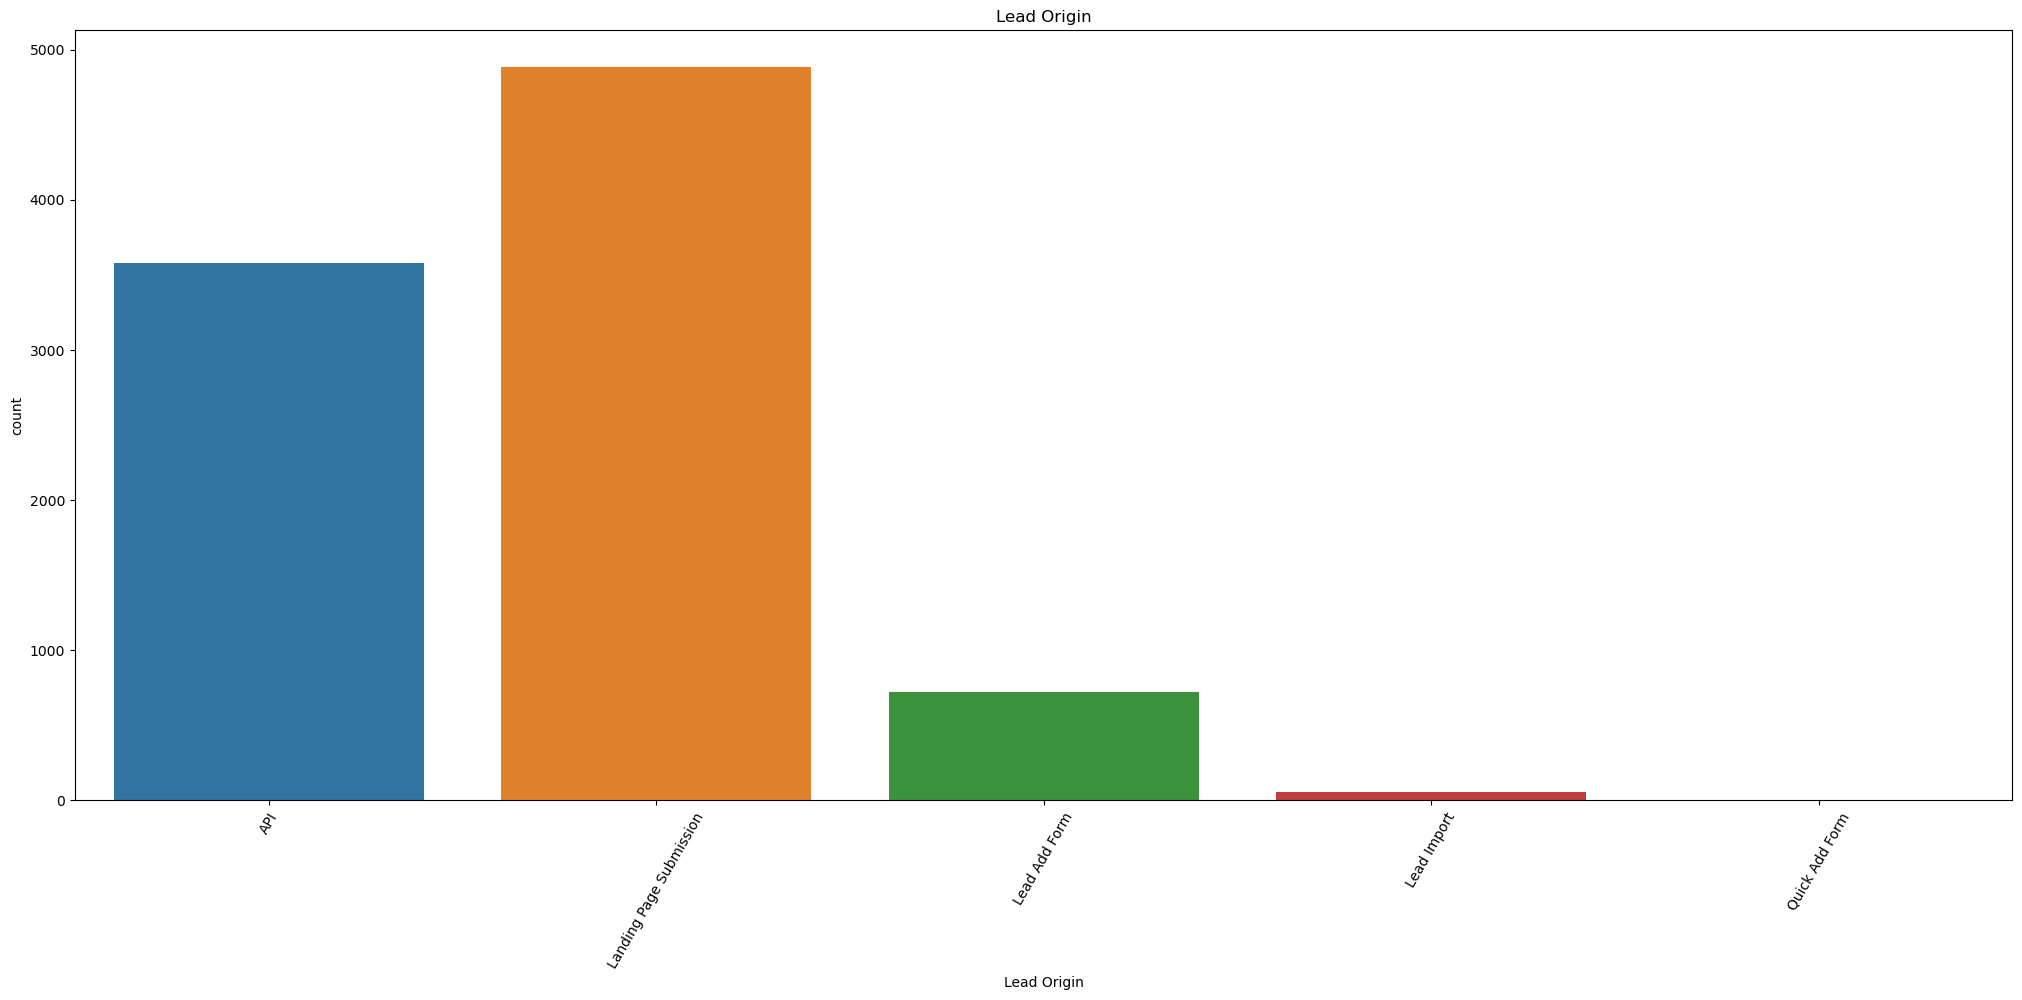

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


In [31]:
# Graphical representation of "Lead Origin" column

plt.subplots(figsize=(25, 10))
sns.countplot(df['Lead Origin'])
plt.title("Lead Origin")
plt.xticks(rotation=60)
plt.show()

print(df['Lead Origin'].value_counts(dropna=False))

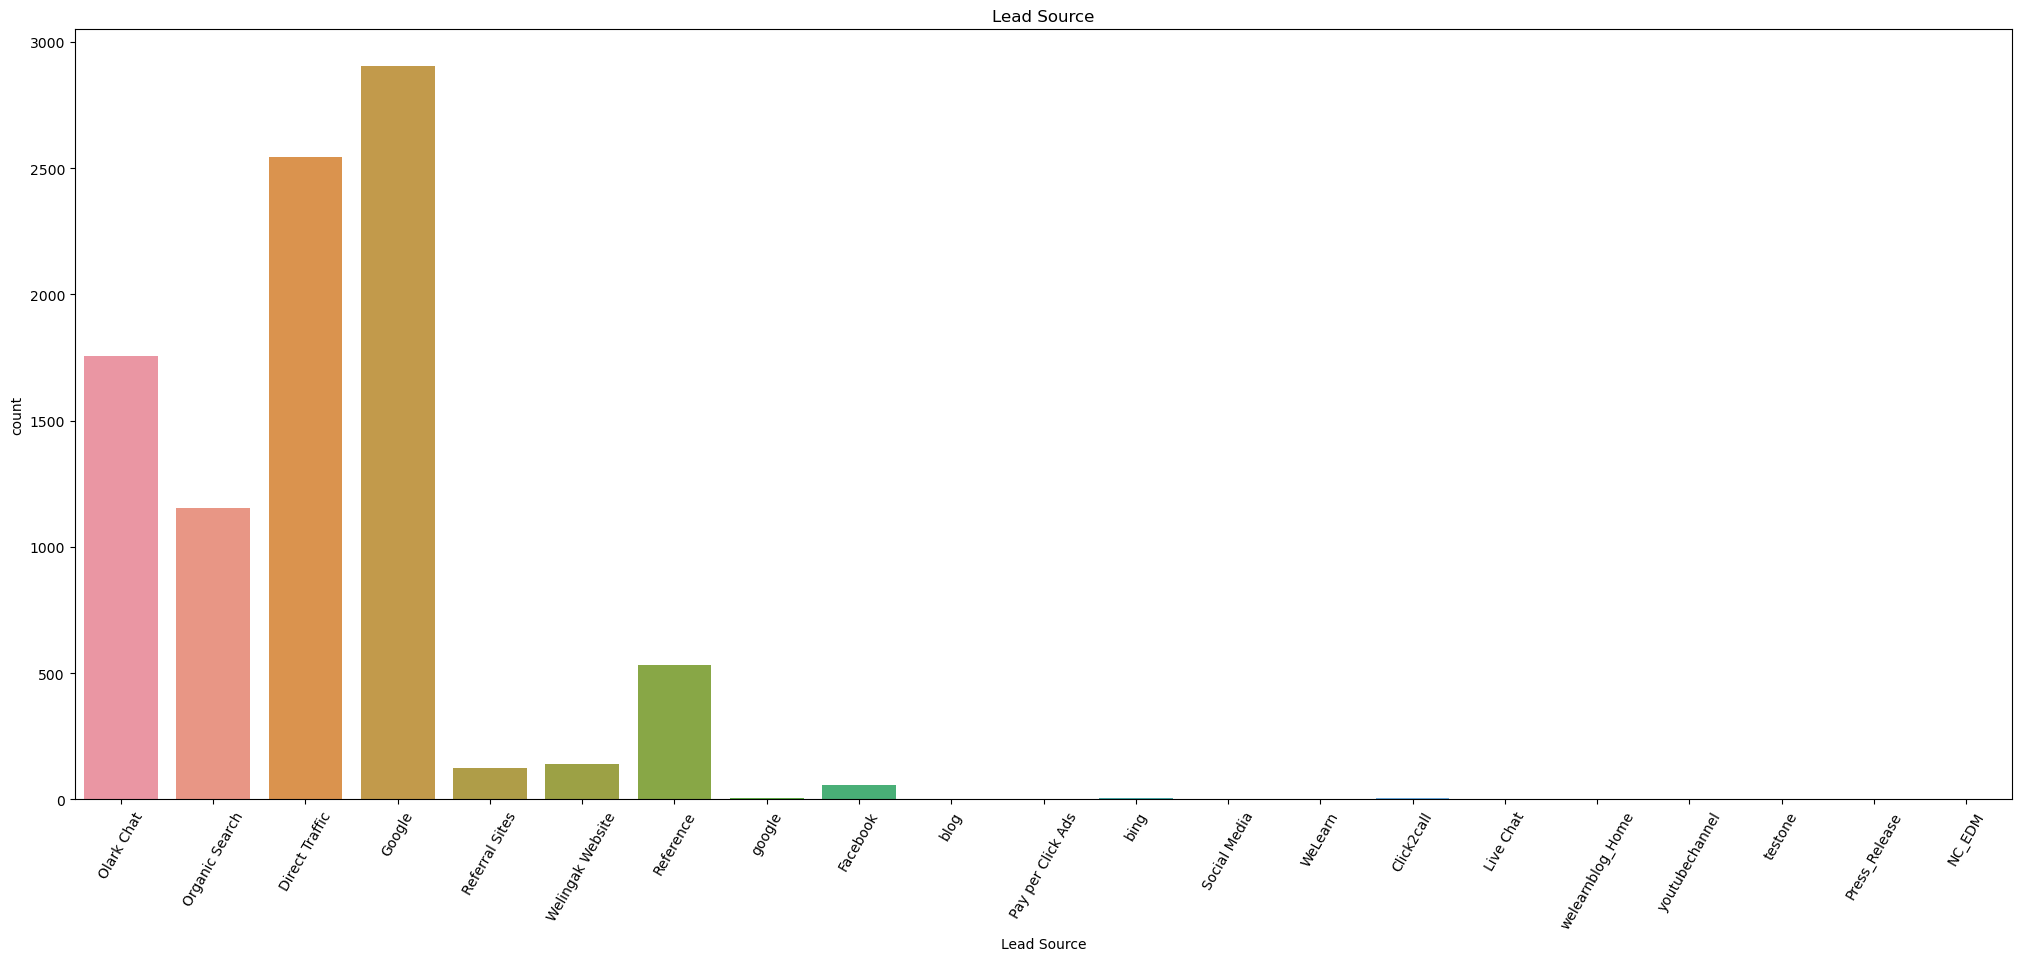

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


In [32]:
# Graphical representation of "Lead Source" column

plt.subplots(figsize=(25, 10))
sns.countplot(df['Lead Source'])
plt.title("Lead Source")
plt.xticks(rotation=60)
plt.show()

print(df['Lead Source'].value_counts(dropna=False))

In the above graph we can see that few names are repeated with grammatical changes which needs to be replaced with correct Names.

In [33]:
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','youtubechannel','testone', 
                                               'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog','NC_EDM'] , 'Others')
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Facebook'], 'Social Media')

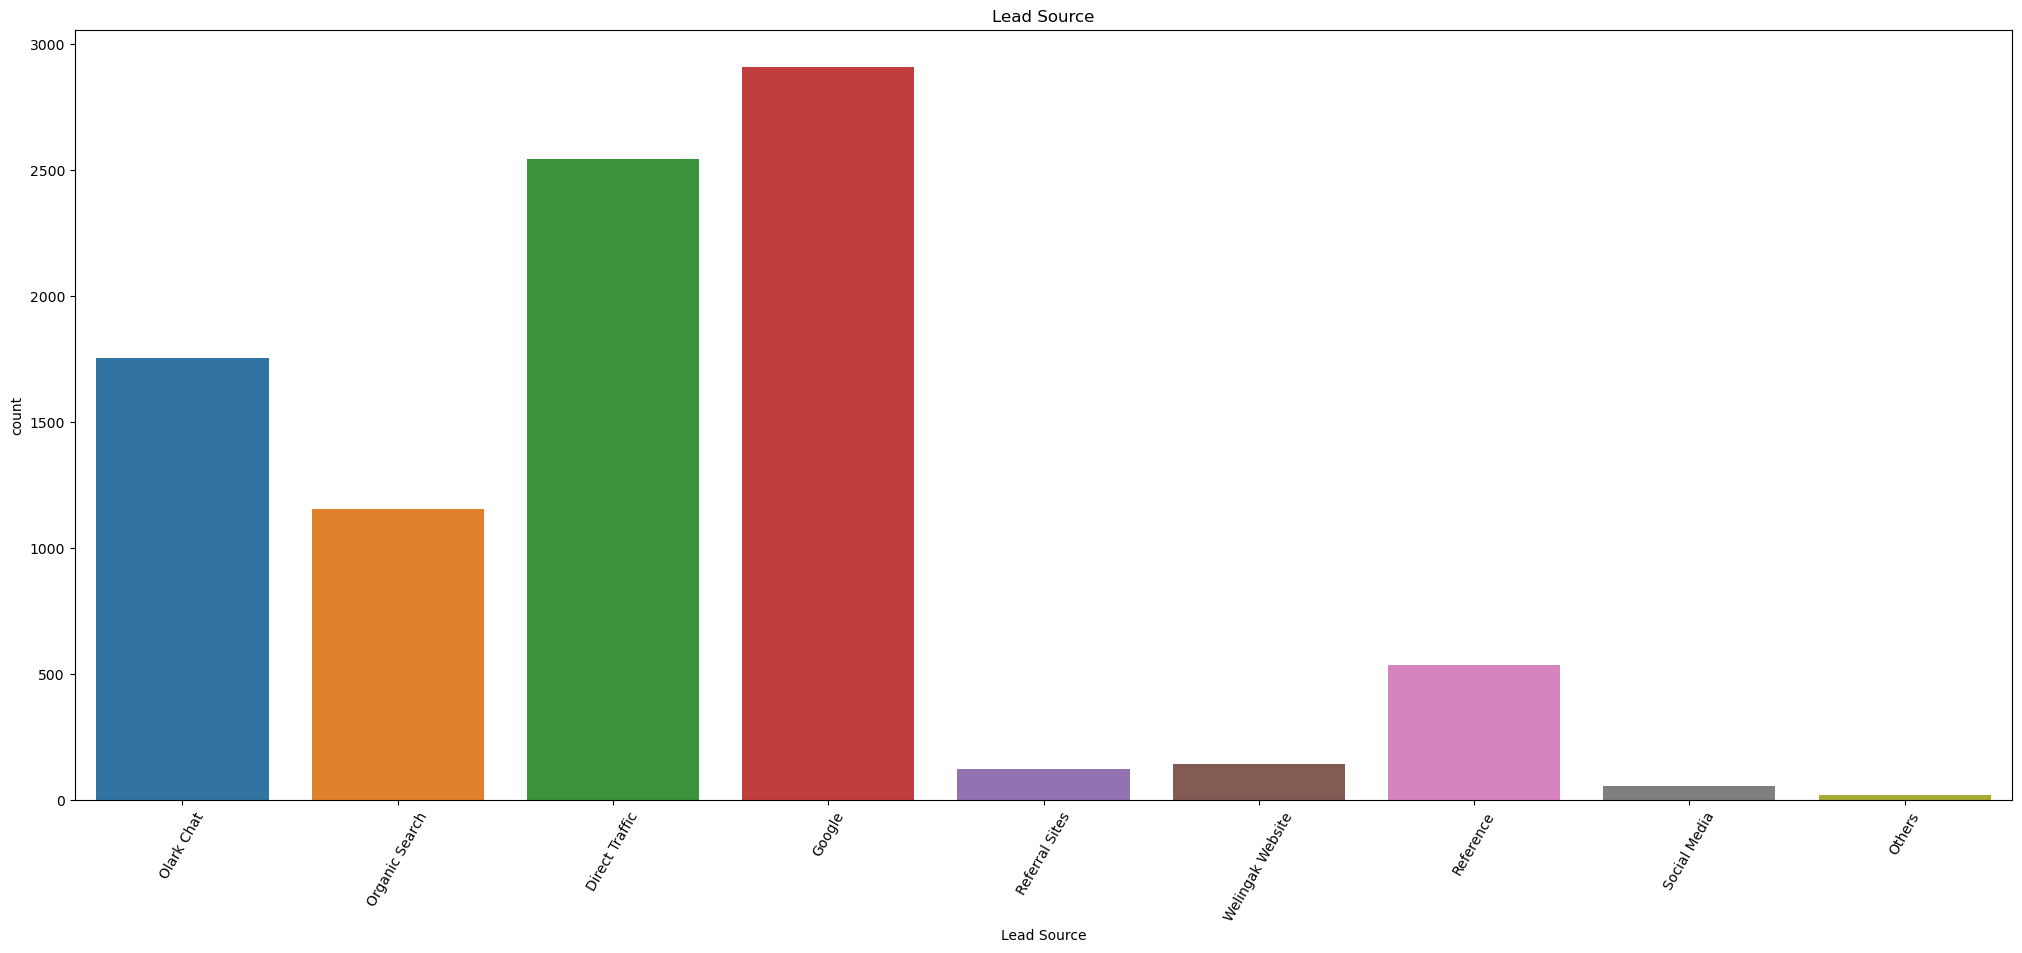

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                21
Name: Lead Source, dtype: int64


In [34]:
# Graphical representation of "Lead Source" column after the necessary renaming of its contents.

plt.subplots(figsize=(25, 10))
sns.countplot(df['Lead Source'])
plt.title("Lead Source")
plt.xticks(rotation=60)
plt.show()

print(df['Lead Source'].value_counts(dropna=False))

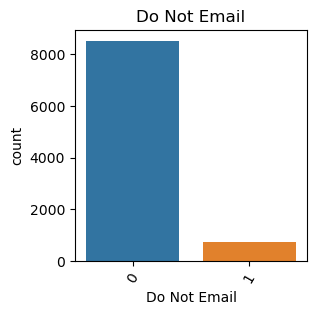

0    8506
1     734
Name: Do Not Email, dtype: int64


In [35]:
# Graphical representation of "Do Not Email" column

plt.subplots(figsize=(3, 3))
sns.countplot(df['Do Not Email'])
plt.title("Do Not Email")
plt.xticks(rotation=60)
plt.show()

print(df['Do Not Email'].value_counts(dropna=False))

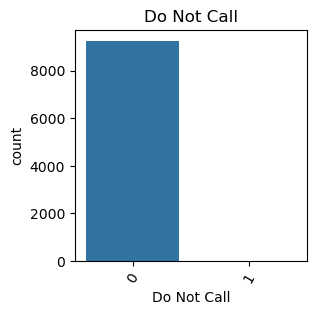

0    9238
1       2
Name: Do Not Call, dtype: int64


In [36]:
# Graphical representation of "Do Not Email" column

plt.subplots(figsize=(3, 3))
sns.countplot(df['Do Not Call'])
plt.title("Do Not Call")
plt.xticks(rotation=60)
plt.show()

print(df['Do Not Call'].value_counts(dropna=False))

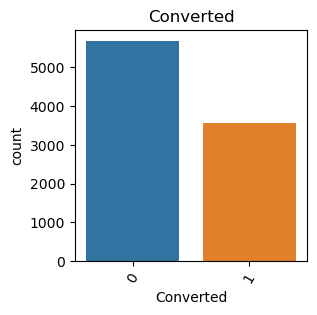

0    5679
1    3561
Name: Converted, dtype: int64


In [37]:
# Graphical representation of "Do Not Email" column

plt.subplots(figsize=(3, 3))
sns.countplot(df['Converted'])
plt.title("Converted")
plt.xticks(rotation=60)
plt.show()

print(df['Converted'].value_counts(dropna=False))

In [38]:
# Graphical representation of "TotalVisits" column

print(df['TotalVisits'].value_counts(dropna=False))

0.000000      2189
2.000000      1680
3.000000      1306
4.000000      1120
5.000000       783
6.000000       466
1.000000       395
7.000000       309
8.000000       224
9.000000       164
3.445238       137
10.000000      114
11.000000       86
13.000000       48
12.000000       45
14.000000       36
16.000000       21
15.000000       18
17.000000       16
18.000000       15
20.000000       12
19.000000        9
21.000000        6
23.000000        6
24.000000        5
25.000000        5
27.000000        5
22.000000        3
29.000000        2
28.000000        2
26.000000        2
141.000000       1
55.000000        1
30.000000        1
43.000000        1
74.000000        1
41.000000        1
54.000000        1
115.000000       1
251.000000       1
32.000000        1
42.000000        1
Name: TotalVisits, dtype: int64


In [39]:
# Graphical representation of "TotalVisits" column

print(df['Last Activity'].value_counts(dropna=False))

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


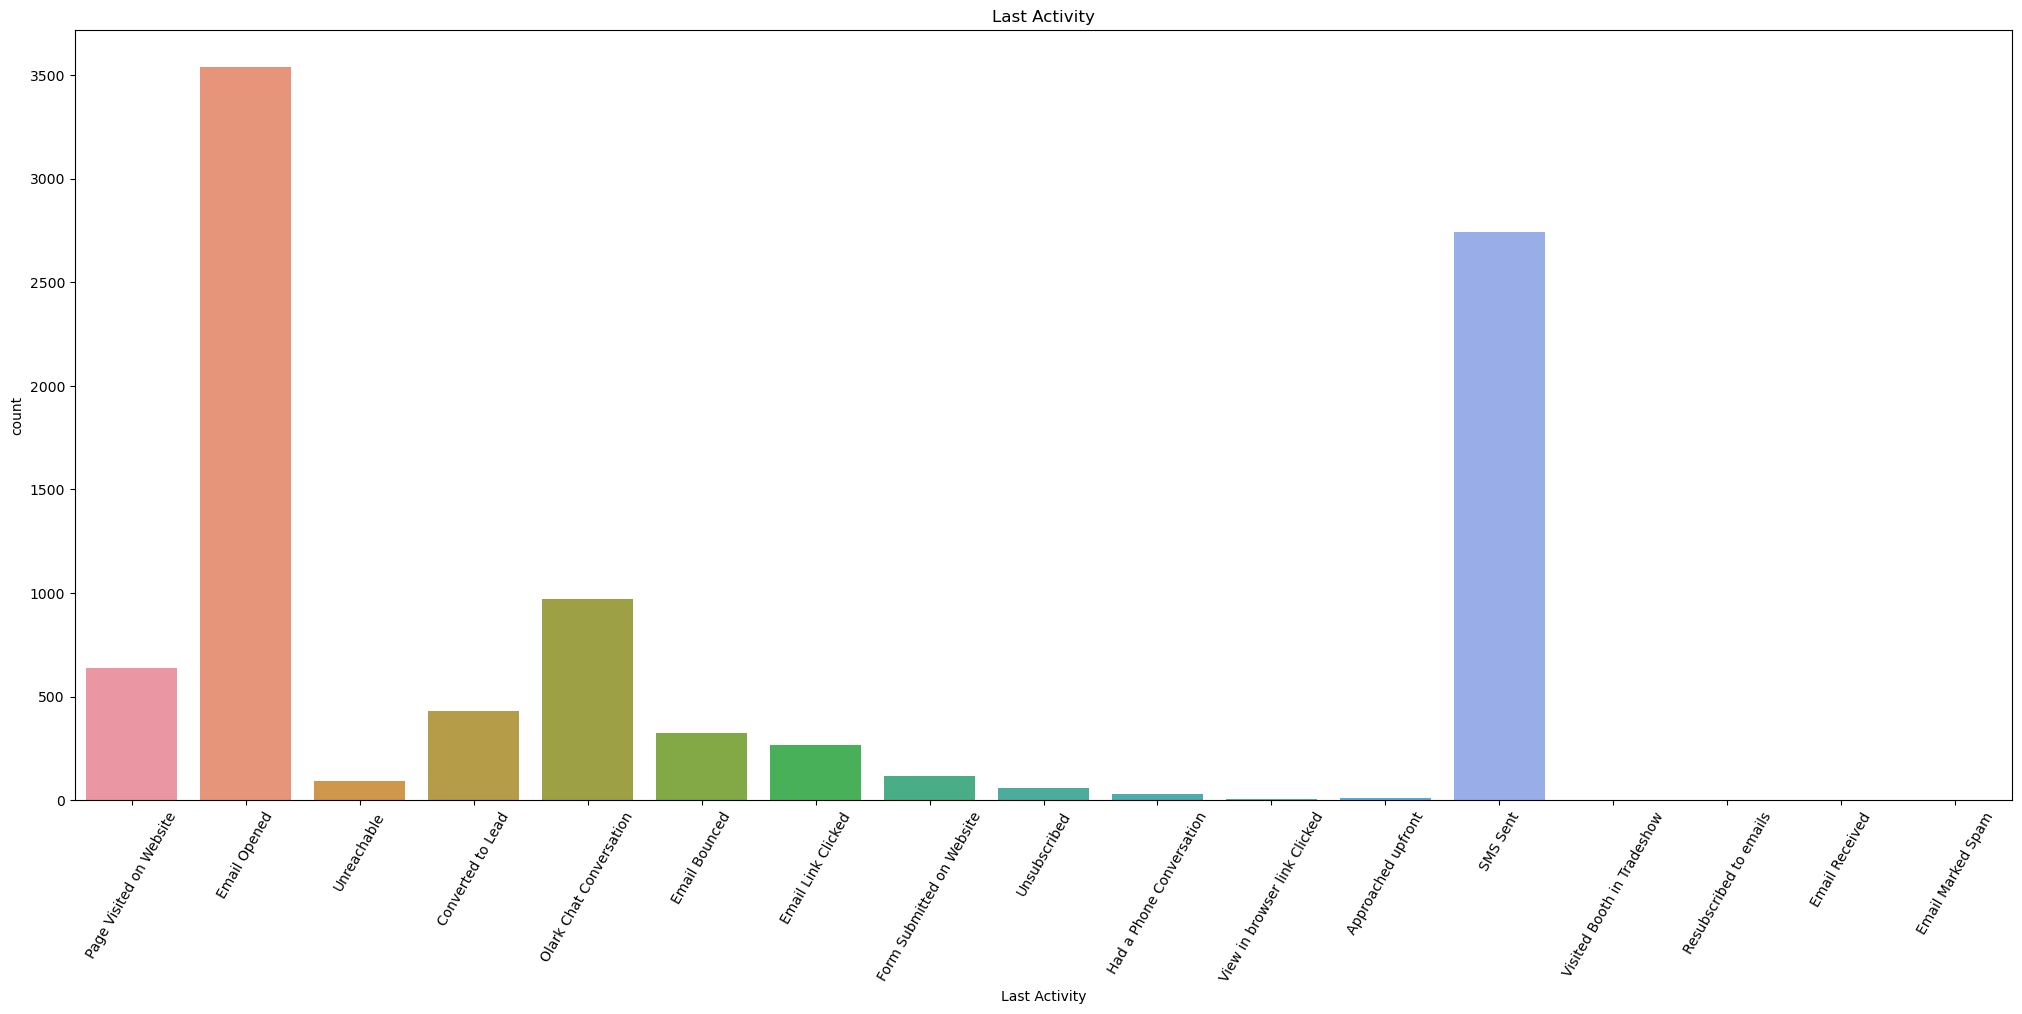

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


In [40]:
# Graphical representation of "Last Activity" column

plt.subplots(figsize=(25, 10))
sns.countplot(df['Last Activity'])
plt.title("Last Activity")
plt.xticks(rotation=60)
plt.show()

print(df['Last Activity'].value_counts(dropna=False))

In [41]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received', 'Email Marked Spam', 
                                                   'Visited Booth in Tradeshow', 'Resubscribed to emails'] , 'Other_Tags')

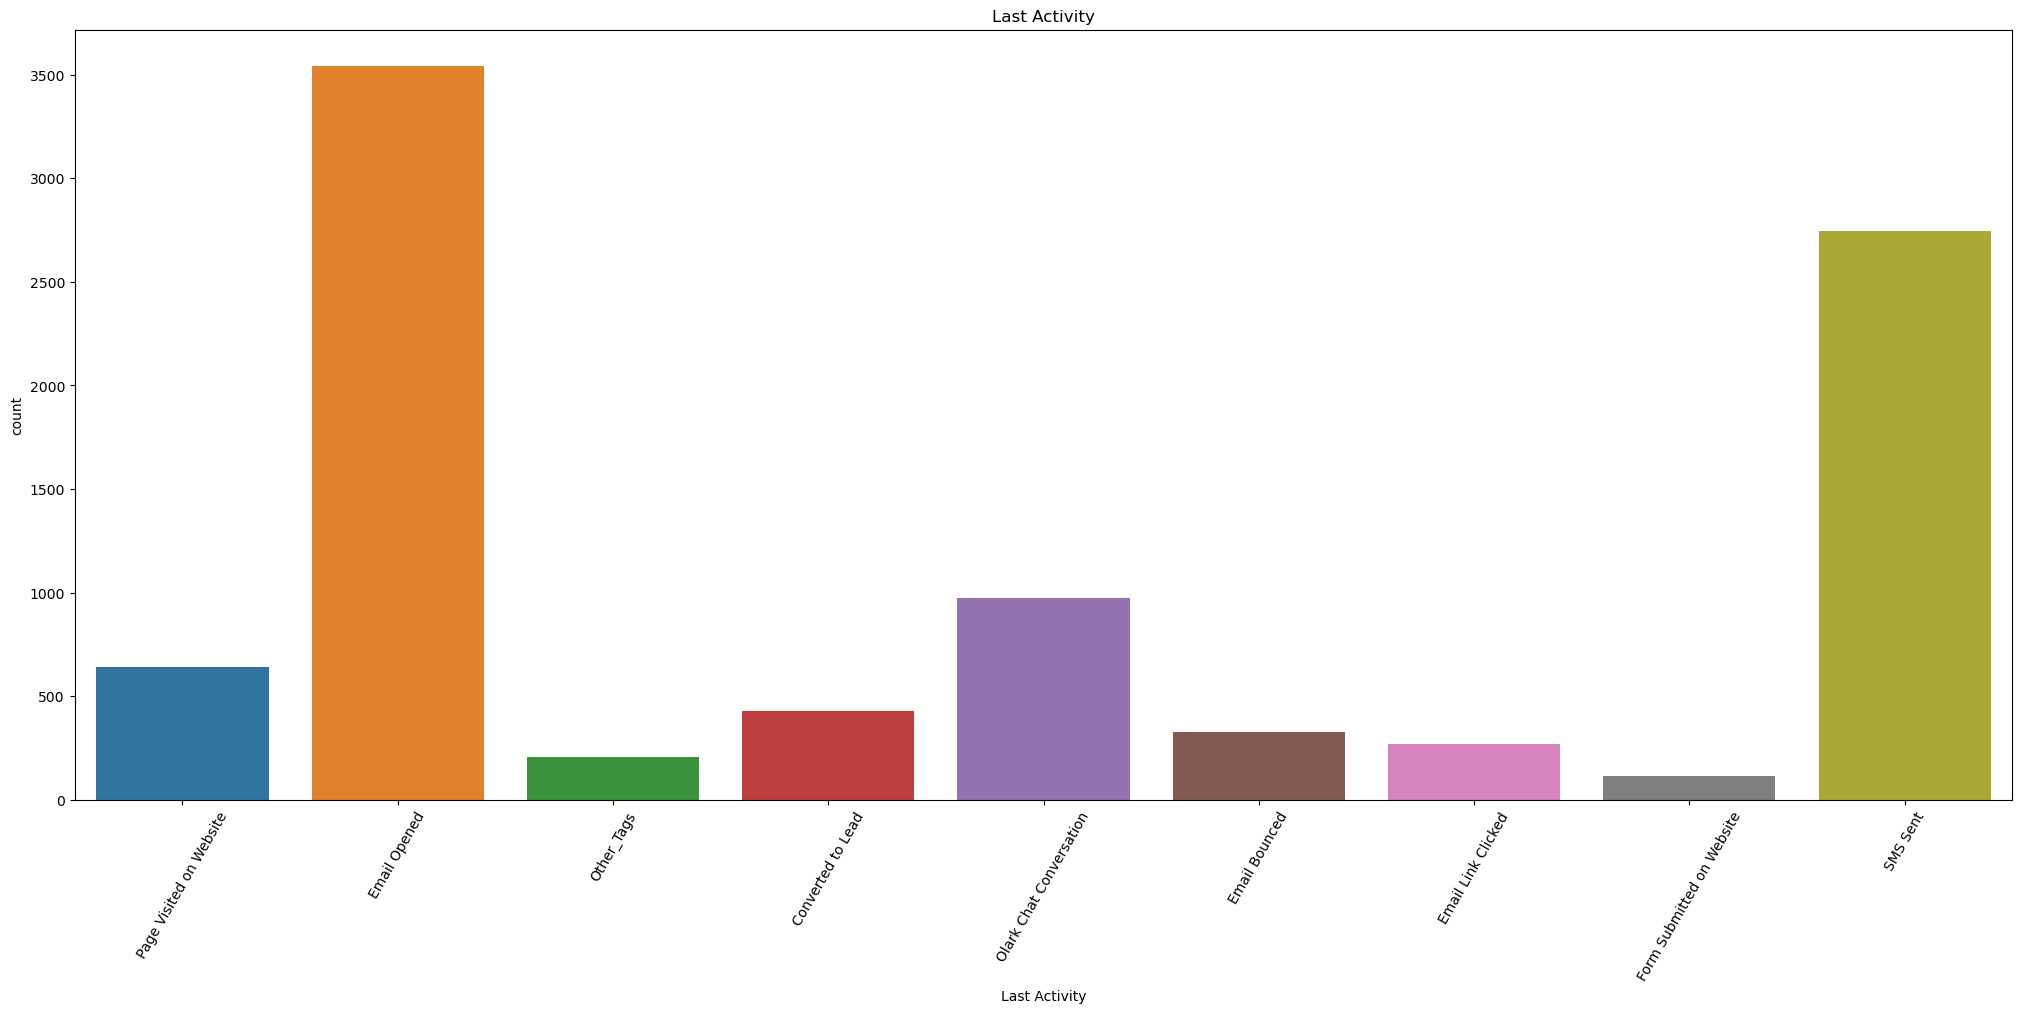

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Other_Tags                    205
Form Submitted on Website     116
Name: Last Activity, dtype: int64


In [42]:
# Graphical representation of "Last Activity" after replacing the column values.

plt.subplots(figsize=(25, 10))
sns.countplot(df['Last Activity'])
plt.title("Last Activity")
plt.xticks(rotation=60)
plt.show()

print(df['Last Activity'].value_counts(dropna=False))

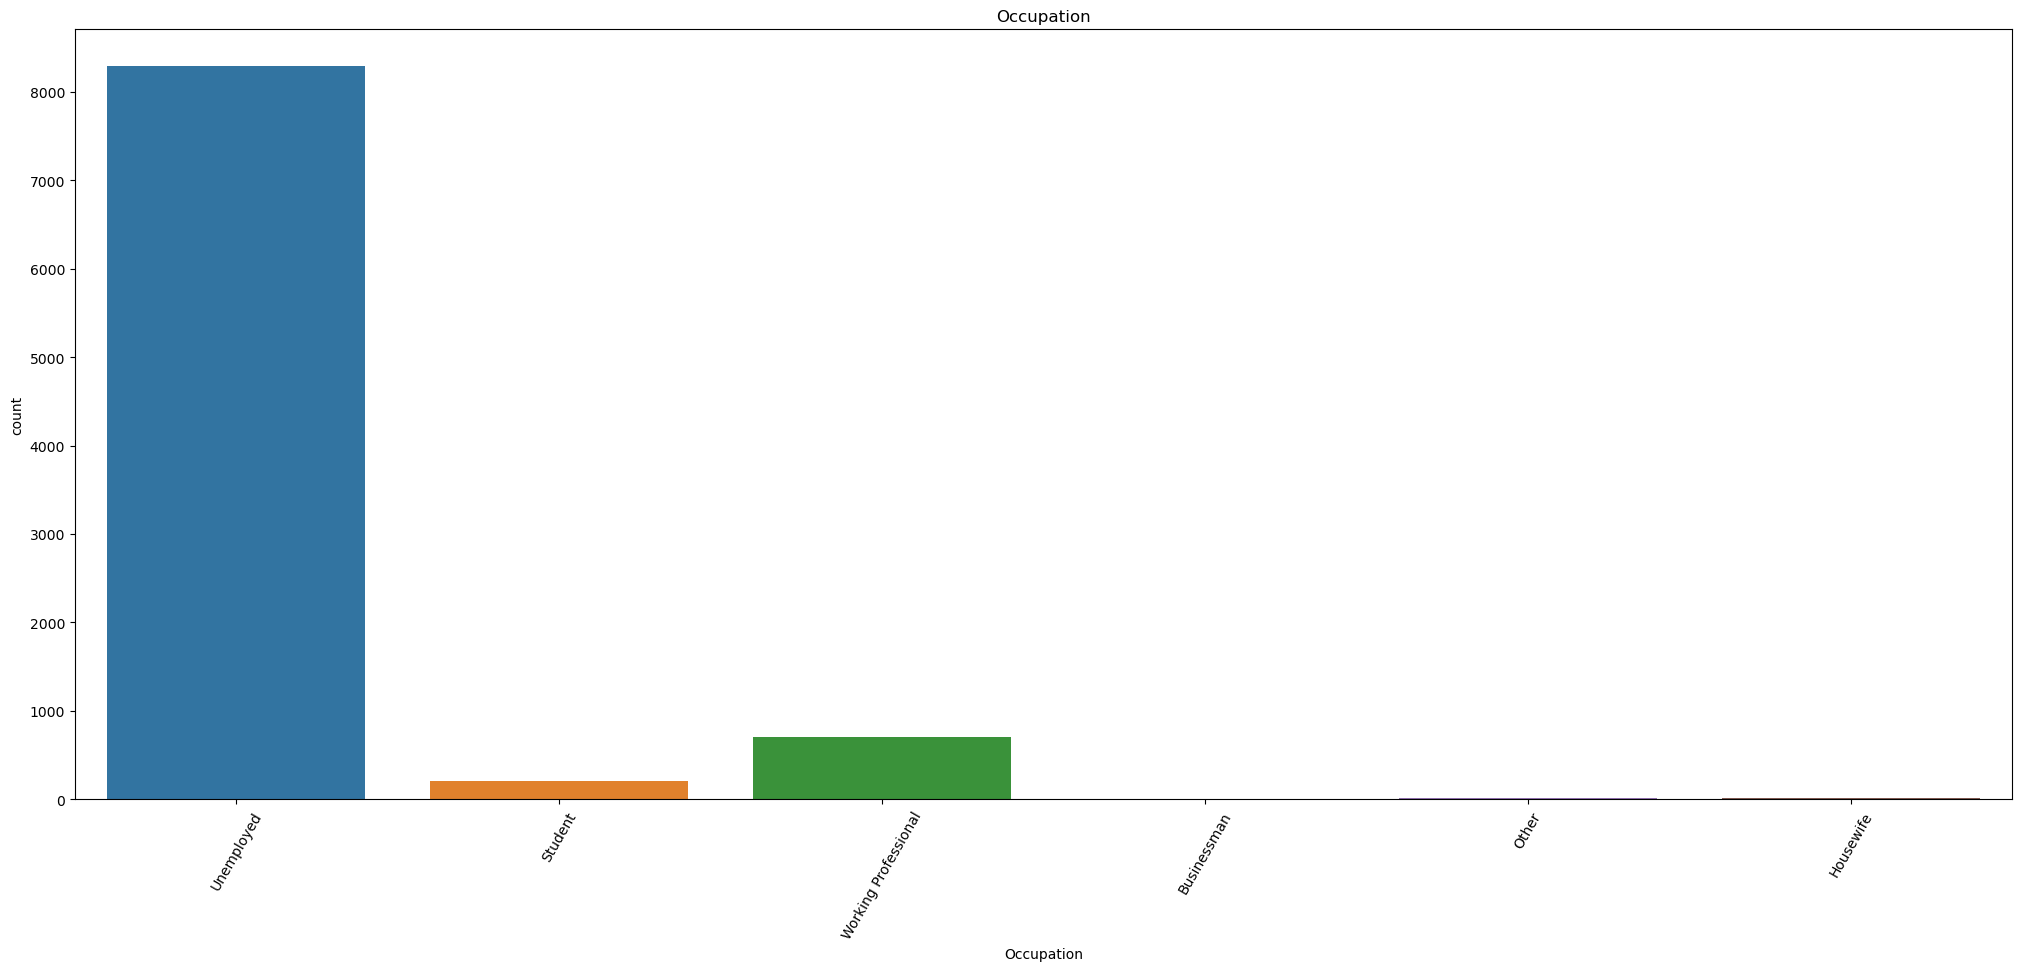

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64


In [43]:
# Graphical representation of "Last Activity" column.

plt.subplots(figsize=(25, 10))
sns.countplot(df['Occupation'])
plt.title("Occupation")
plt.xticks(rotation=60)
plt.show()

print(df['Occupation'].value_counts(dropna=False))

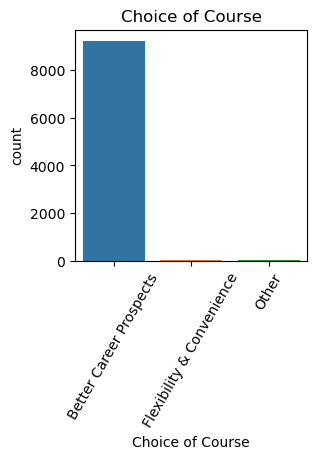

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: Choice of Course, dtype: int64


In [44]:
# Graphical representation of "Choice of Course" column.

plt.subplots(figsize=(3, 3))
sns.countplot(df['Choice of Course'])
plt.title("Choice of Course")
plt.xticks(rotation=60)
plt.show()

print(df['Choice of Course'].value_counts(dropna=False))

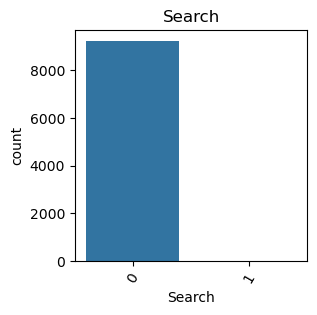

0    9226
1      14
Name: Search, dtype: int64


In [45]:
# Graphical representation of "Search" column.

plt.subplots(figsize=(3, 3))
sns.countplot(df['Search'])
plt.title("Search")
plt.xticks(rotation=60)
plt.show()

print(df['Search'].value_counts(dropna=False))

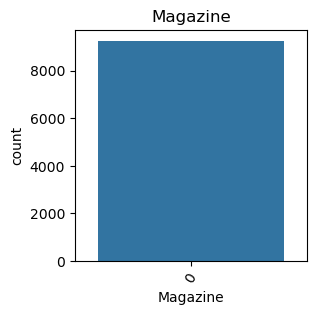

0    9240
Name: Magazine, dtype: int64


In [46]:
# Graphical representation of "Magazine" column.

plt.subplots(figsize=(3, 3))
sns.countplot(df['Magazine'])
plt.title("Magazine")
plt.xticks(rotation=60)
plt.show()

print(df['Magazine'].value_counts(dropna=False))

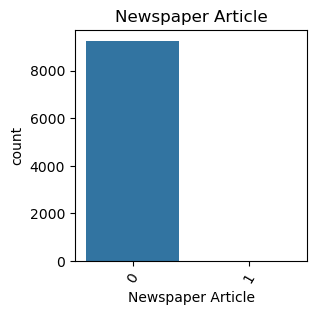

0    9238
1       2
Name: Newspaper Article, dtype: int64


In [47]:
# Graphical representation of "Newspaper Article" column.

plt.subplots(figsize=(3, 3))
sns.countplot(df['Newspaper Article'])
plt.title("Newspaper Article")
plt.xticks(rotation=60)
plt.show()

print(df['Newspaper Article'].value_counts(dropna=False))

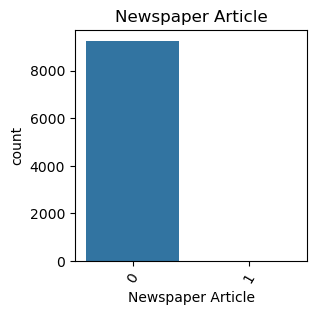

0    9238
1       2
Name: Newspaper Article, dtype: int64


In [48]:
# Graphical representation of "Newspaper Article" column.

plt.subplots(figsize=(3, 3))
sns.countplot(df['Newspaper Article'])
plt.title("Newspaper Article")
plt.xticks(rotation=60)
plt.show()

print(df['Newspaper Article'].value_counts(dropna=False))

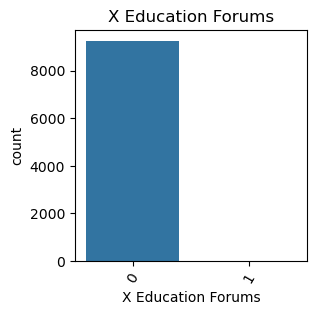

0    9239
1       1
Name: X Education Forums, dtype: int64


In [49]:
# Graphical representation of "X Education Forums" column.

plt.subplots(figsize=(3, 3))
sns.countplot(df['X Education Forums'])
plt.title("X Education Forums")
plt.xticks(rotation=60)
plt.show()

print(df['X Education Forums'].value_counts(dropna=False))

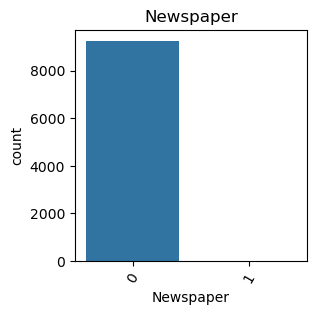

0    9239
1       1
Name: Newspaper, dtype: int64


In [50]:
# Graphical representation of "X Education Forums" column.

plt.subplots(figsize=(3, 3))
sns.countplot(df['Newspaper'])
plt.title("Newspaper")
plt.xticks(rotation=60)
plt.show()

print(df['Newspaper'].value_counts(dropna=False))

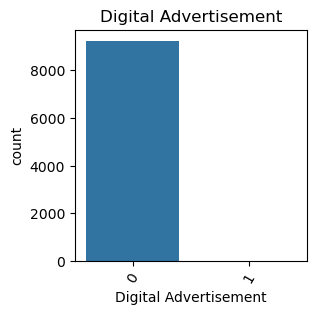

0    9236
1       4
Name: Digital Advertisement, dtype: int64


In [51]:
# Graphical representation of "Digital Advertisement" column.

plt.subplots(figsize=(3, 3))
sns.countplot(df['Digital Advertisement'])
plt.title("Digital Advertisement")
plt.xticks(rotation=60)
plt.show()

print(df['Digital Advertisement'].value_counts(dropna=False))

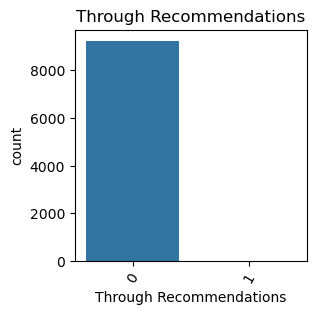

0    9233
1       7
Name: Through Recommendations, dtype: int64


In [52]:
# Graphical representation of "Through Recommendations" column.

plt.subplots(figsize=(3, 3))
sns.countplot(df['Through Recommendations'])
plt.title("Through Recommendations")
plt.xticks(rotation=60)
plt.show()

print(df['Through Recommendations'].value_counts(dropna=False))

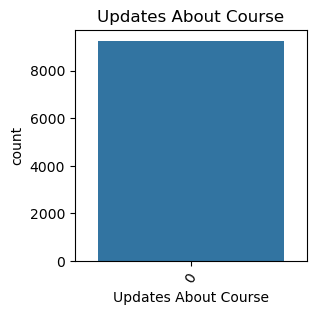

0    9240
Name: Updates About Course, dtype: int64


In [53]:
# Graphical representation of "Updates About Course" column.

plt.subplots(figsize=(3, 3))
sns.countplot(df['Updates About Course'])
plt.title("Updates About Course")
plt.xticks(rotation=60)
plt.show()

print(df['Updates About Course'].value_counts(dropna=False))

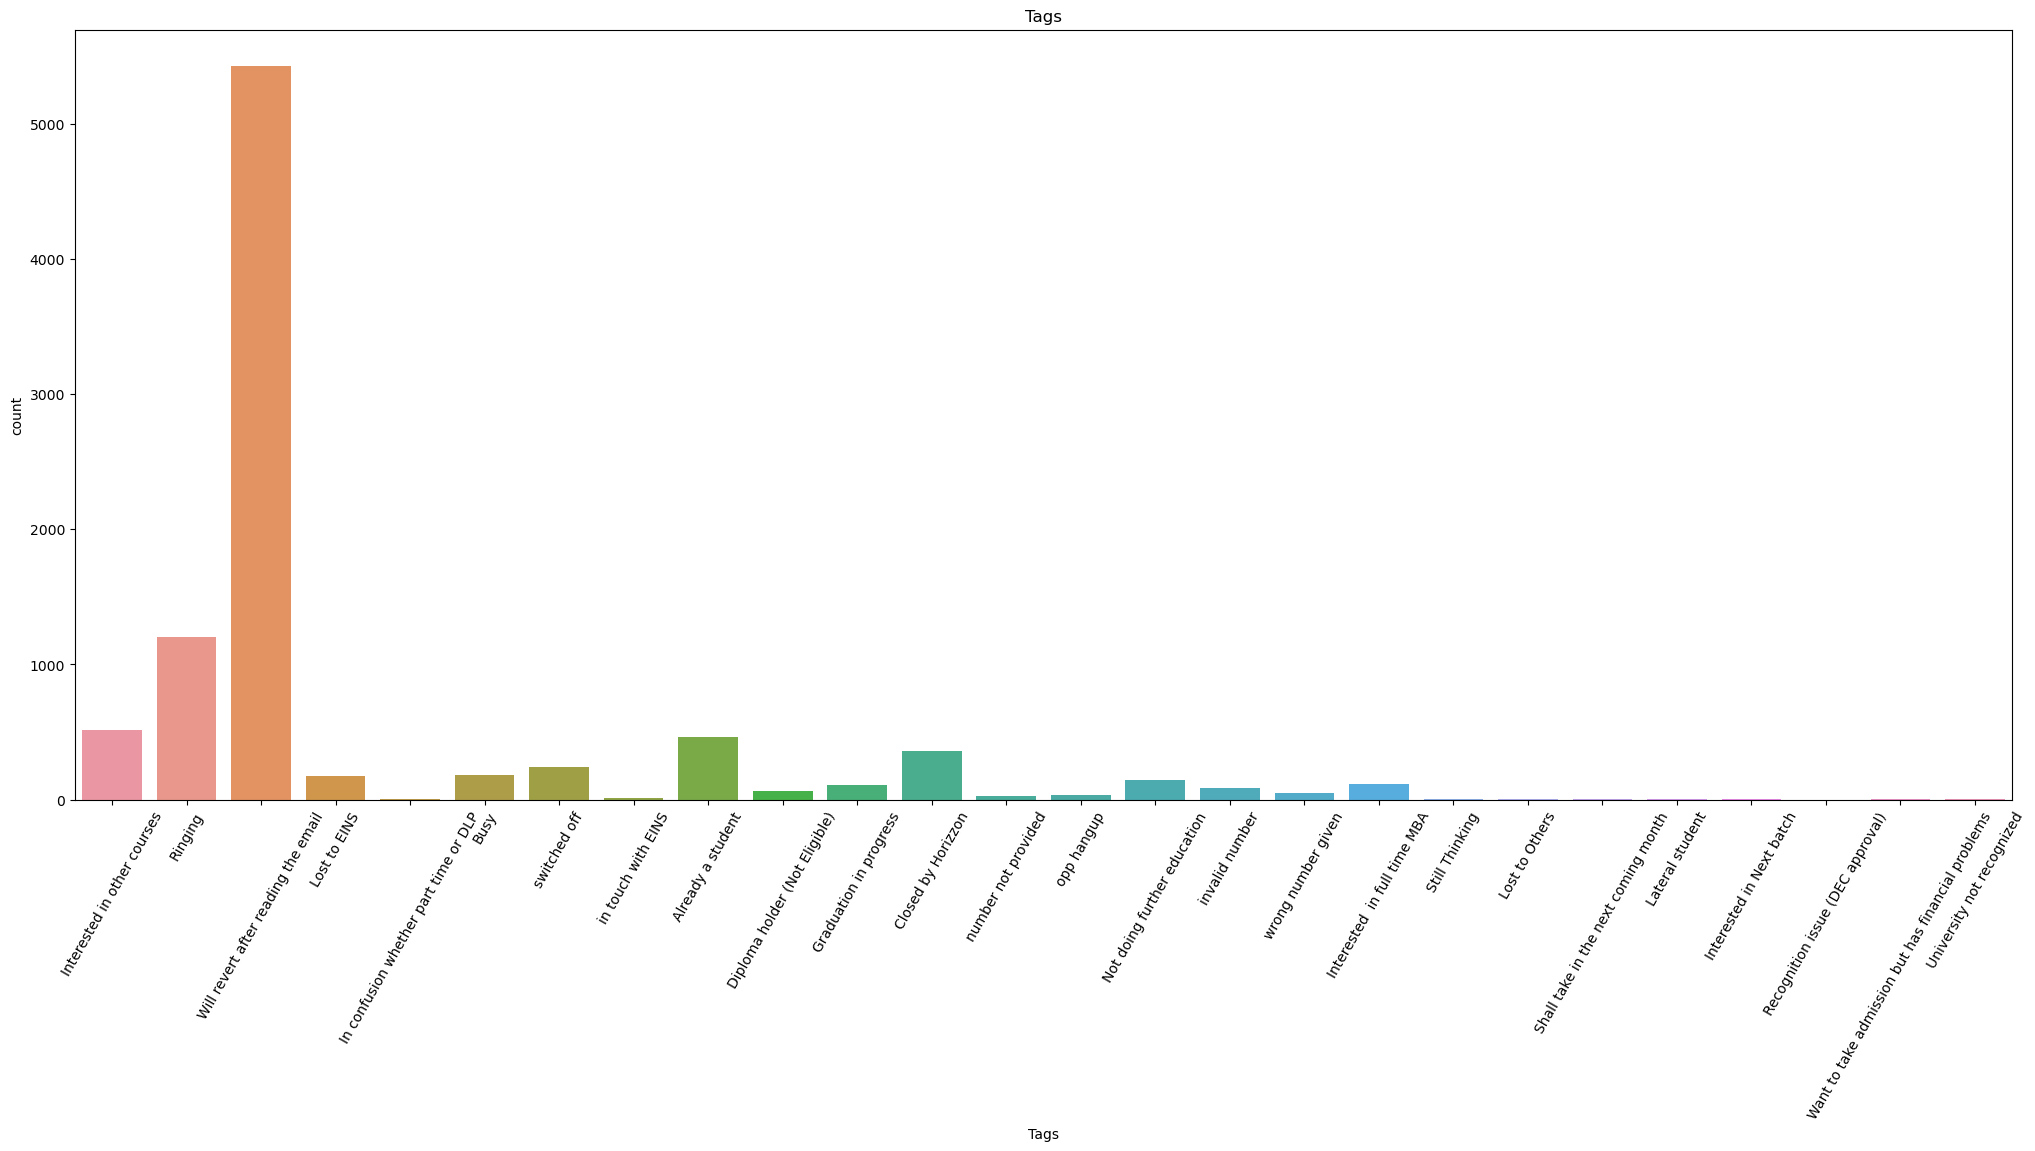

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [54]:
# Graphical representation of "Tags" column.

plt.subplots(figsize=(25, 10))
sns.countplot(df['Tags'])
plt.title("Tags")
plt.xticks(rotation=60)
plt.show()

print(df['Tags'].value_counts(dropna=False))

Here few data points can be clubbed under Other_Tags column which are low in numbers.

In [55]:
#replace 'tags' column low frequency data with term 'Other_Tags'

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                     'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                     'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                     'University not recognized','switched off','Already a student','Not doing further education','invalid number',
                                     'wrong number given','Interested  in full time MBA'], 'Other_Tags')

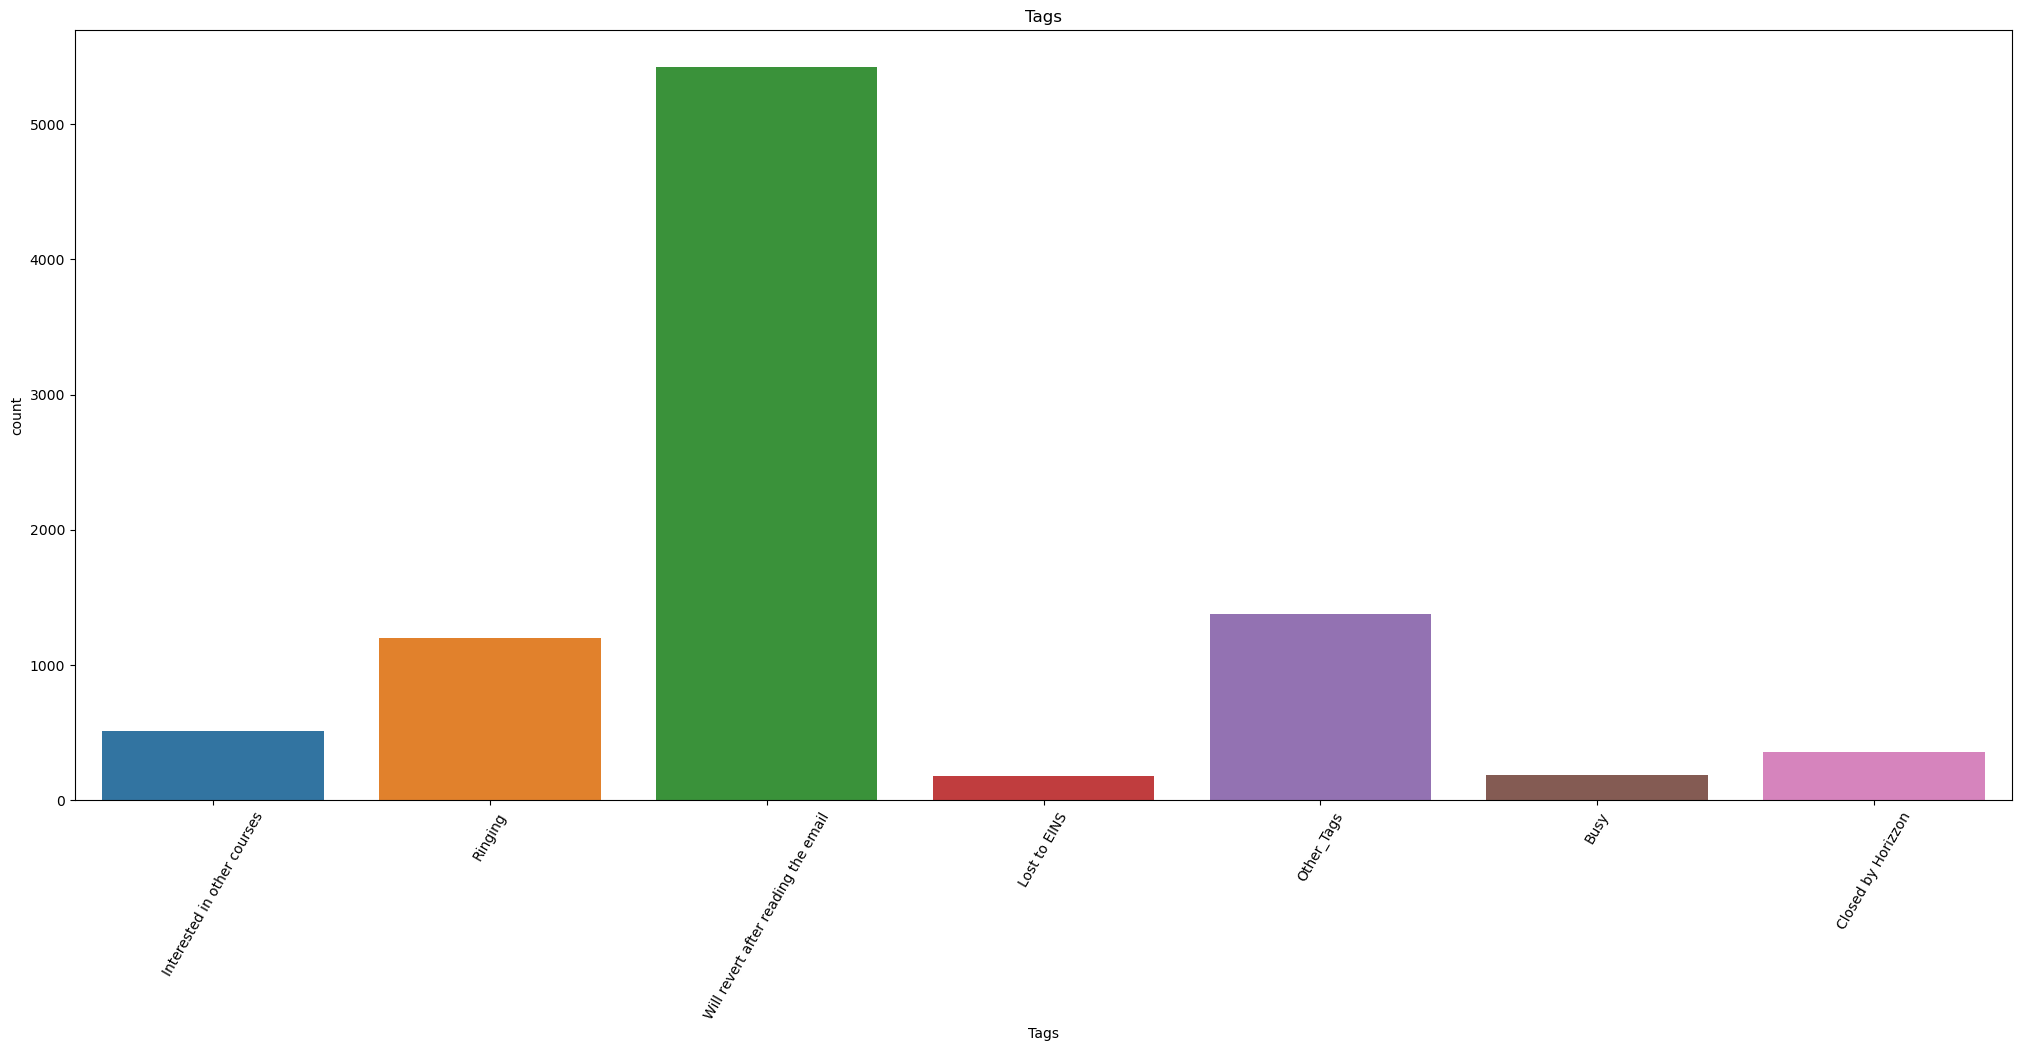

Will revert after reading the email    5425
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64


In [56]:
# Graphical representation of "Tags" column.

plt.subplots(figsize=(25, 10))
sns.countplot(df['Tags'])
plt.title("Tags")
plt.xticks(rotation=60)
plt.show()

print(df['Tags'].value_counts(dropna=False))

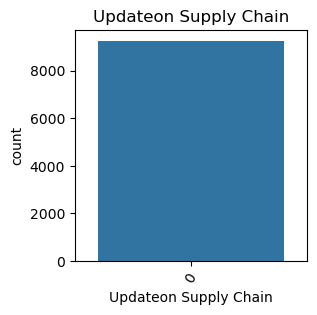

0    9240
Name: Updateon Supply Chain, dtype: int64


In [57]:
# Graphical representation of "Updateon Supply Chain" column.

plt.subplots(figsize=(3,3))
sns.countplot(df['Updateon Supply Chain'])
plt.title("Updateon Supply Chain")
plt.xticks(rotation=60)
plt.show()

print(df['Updateon Supply Chain'].value_counts(dropna=False))

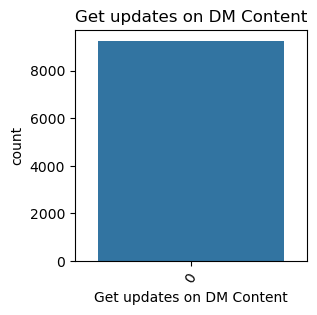

0    9240
Name: Get updates on DM Content, dtype: int64


In [58]:
# Graphical representation of "Get updates on DM Content" column.

plt.subplots(figsize=(3,3))
sns.countplot(df['Get updates on DM Content'])
plt.title("Get updates on DM Content")
plt.xticks(rotation=60)
plt.show()

print(df['Get updates on DM Content'].value_counts(dropna=False))

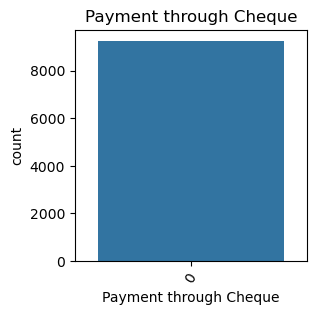

0    9240
Name: Payment through Cheque, dtype: int64


In [59]:
# Graphical representation of "Payment through Cheque" column.

plt.subplots(figsize=(3,3))
sns.countplot(df['Payment through Cheque'])
plt.title("Payment through Cheque")
plt.xticks(rotation=60)
plt.show()

print(df['Payment through Cheque'].value_counts(dropna=False))

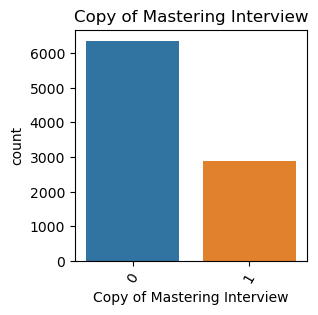

0    6352
1    2888
Name: Copy of Mastering Interview, dtype: int64


In [60]:
# Graphical representation of "Copy of Mastering Interview" column.

plt.subplots(figsize=(3,3))
sns.countplot(df['Copy of Mastering Interview'])
plt.title("Copy of Mastering Interview")
plt.xticks(rotation=60)
plt.show()

print(df['Copy of Mastering Interview'].value_counts(dropna=False))

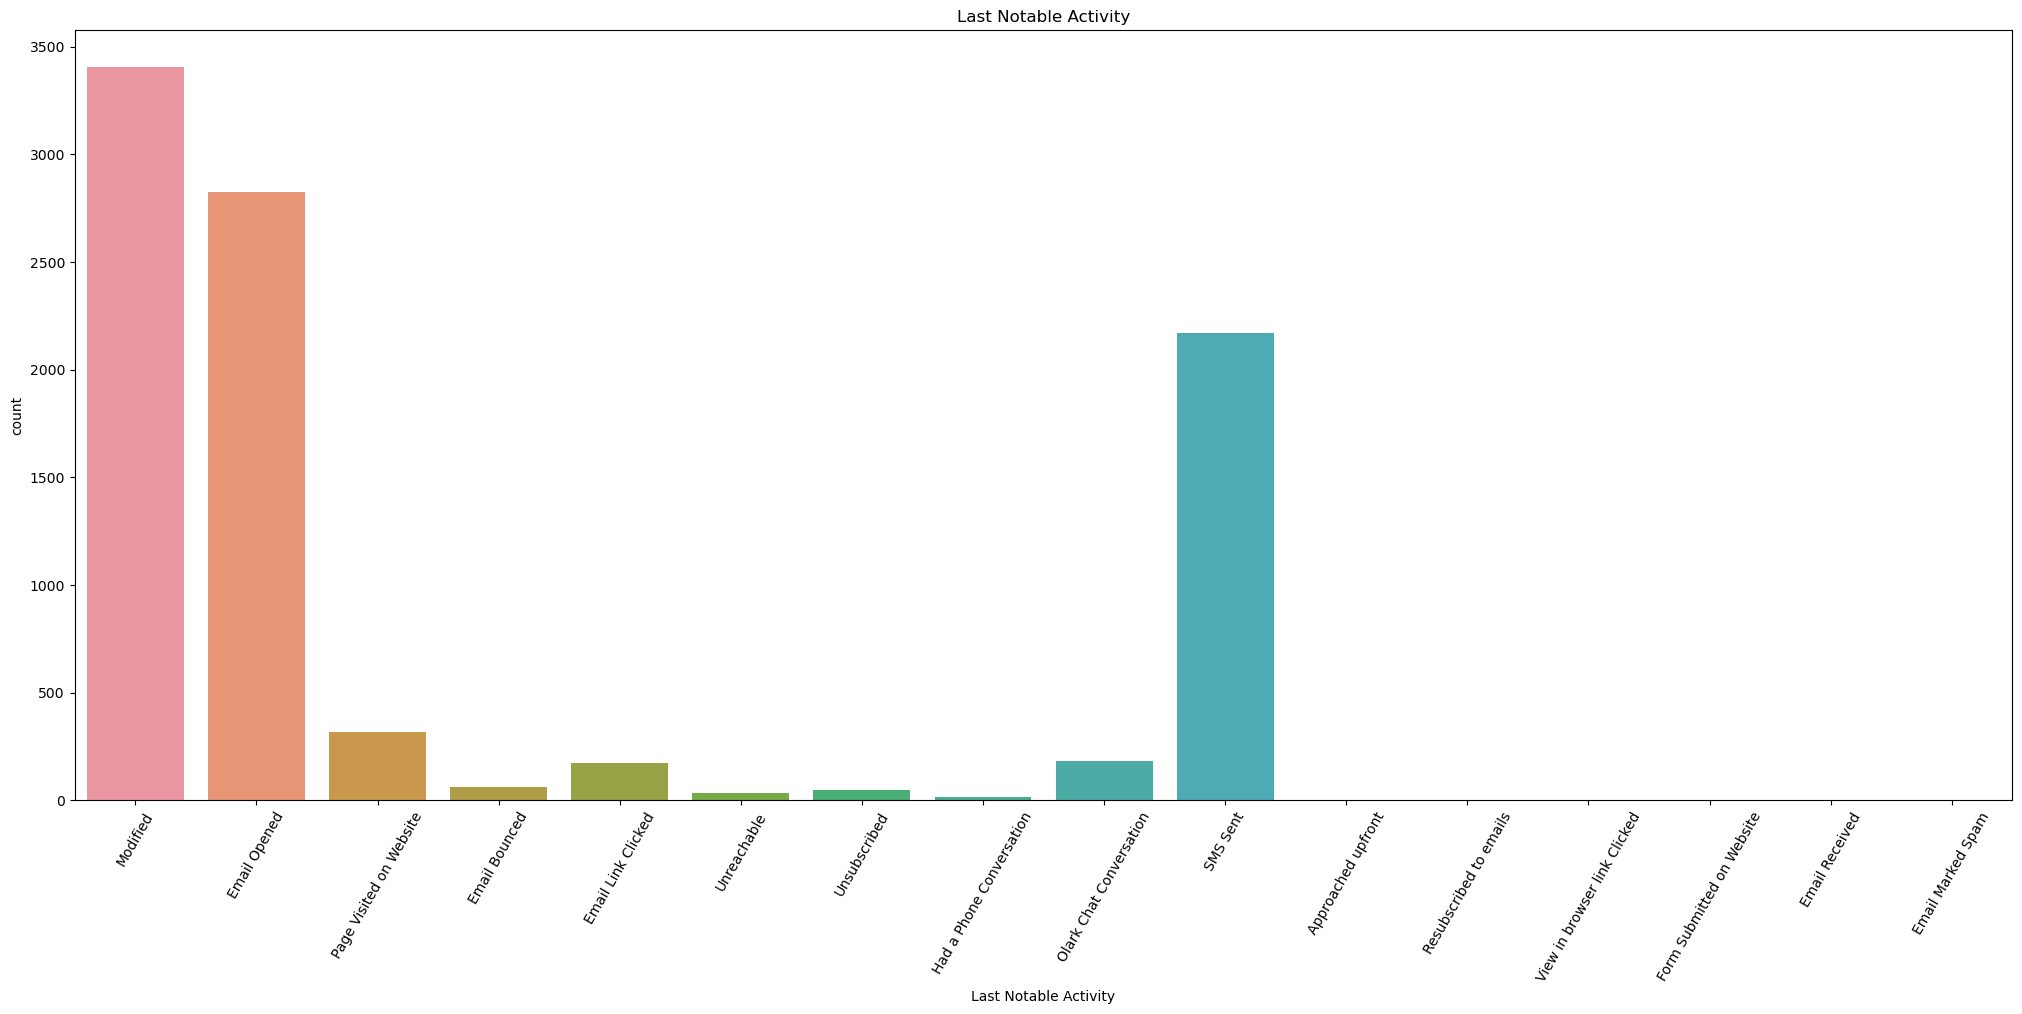

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64


In [61]:
# Graphical representation of "Last Notable Activity" column.

plt.subplots(figsize=(25, 10))
sns.countplot(df['Last Notable Activity'])
plt.title("Last Notable Activity")
plt.xticks(rotation=60)
plt.show()

print(df['Last Notable Activity'].value_counts(dropna=False))

In [62]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                           'Had a Phone Conversation','Email Marked Spam','Approached upfront', 
                                           'Resubscribed to emails','View in browser link Clicked','View in browser link Clicked',
                                           'Form Submitted on Website', 'Email Received'] , 'Other_Tags')

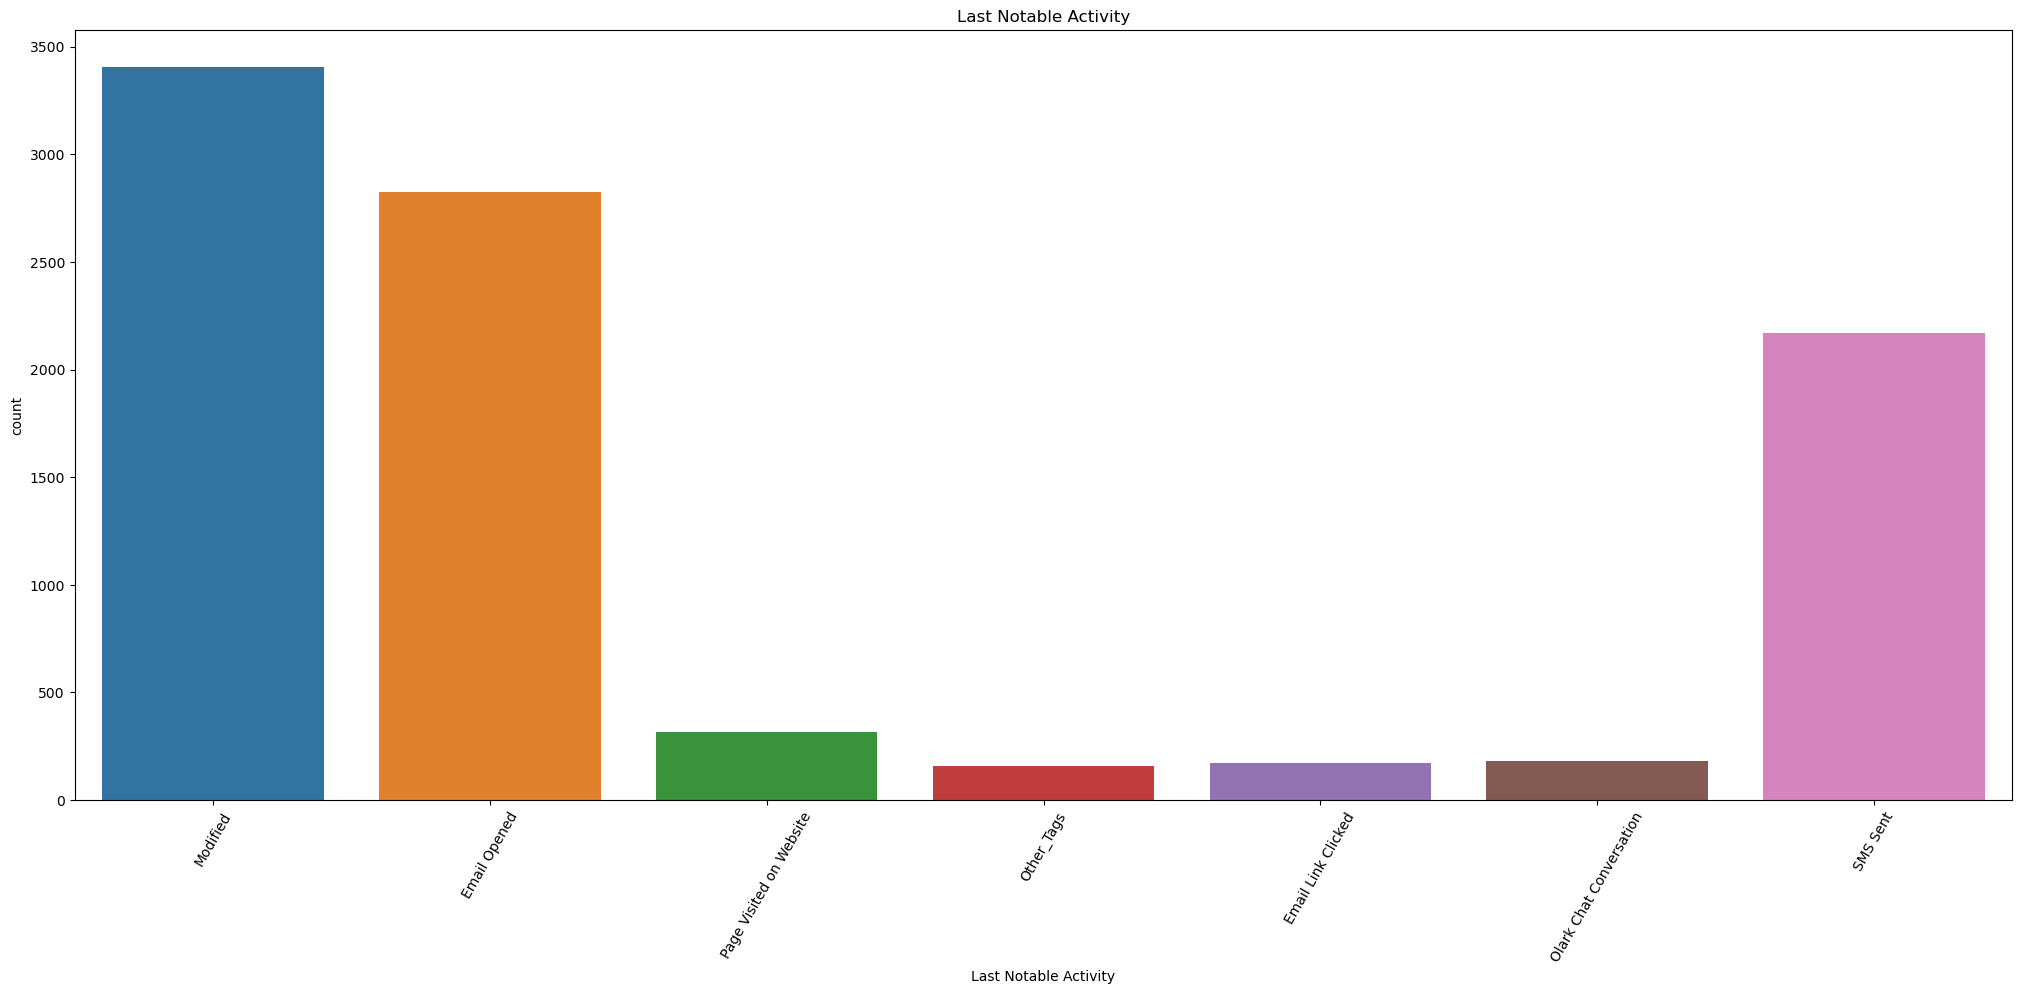

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Tags                  160
Name: Last Notable Activity, dtype: int64


In [63]:
# Graphical representation of "Last Notable Activity" after replacing the column values.

plt.subplots(figsize=(25, 10))
sns.countplot(df['Last Notable Activity'])
plt.title("Last Notable Activity")
plt.xticks(rotation=60)
plt.show()

print(df['Last Notable Activity'].value_counts(dropna=False))

In [64]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'Occupation', 'Choice of Course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Updates About Course', 'Tags', 'Updateon Supply Chain',
       'Get updates on DM Content', 'City', 'Payment through Cheque',
       'Copy of Mastering Interview', 'Last Notable Activity'],
      dtype='object')

In [65]:
# function for plotting repetitive countplots in univariate categorical analysis on the lead dataset
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t Converted; 
# 2. Percentage of converted leads within column

def univariate_categorical(feature,label_rotation=False,horizontal_layout=True):
    temp_count = df[feature].value_counts()
    temp_perc = df[feature].value_counts(normalize = True)
    df1 = pd.DataFrame({feature: temp_count.index,'Total Leads': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)
    
    # Calculate the percentage of Converted=1 per category value
    cat_perc = df[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   
    # 1. Subplot 1: Count plot of categorical column
    sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="Converted",
                    order=cat_perc[feature],
                    palette=['r','g'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Not Converted','Converted'])
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Converted', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted leads [%]', fontsize=15)
    plt.xlabel(feature,fontsize=15) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + "( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

# Lead Origin

               Lead Origin  Total Leads   % Values
0  Landing Page Submission         4886  52.878788
1                      API         3580  38.744589
2            Lead Add Form          718   7.770563
3              Lead Import           55   0.595238
4           Quick Add Form            1   0.010823


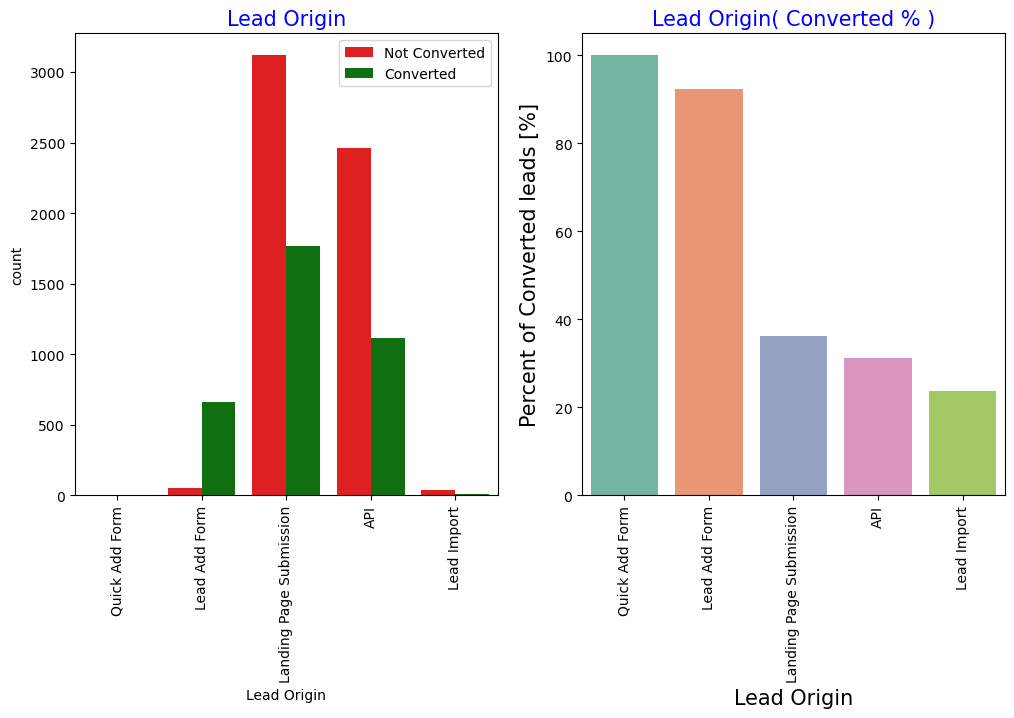

In [66]:
#Run the function to get plot categorical plots 
univariate_categorical("Lead Origin",label_rotation=True)

# Lead Source

        Lead Source  Total Leads   % Values
0            Google         2909  31.482684
1    Direct Traffic         2543  27.521645
2        Olark Chat         1755  18.993506
3    Organic Search         1154  12.489177
4         Reference          534   5.779221
5  Welingak Website          142   1.536797
6    Referral Sites          125   1.352814
7      Social Media           57   0.616883
8            Others           21   0.227273


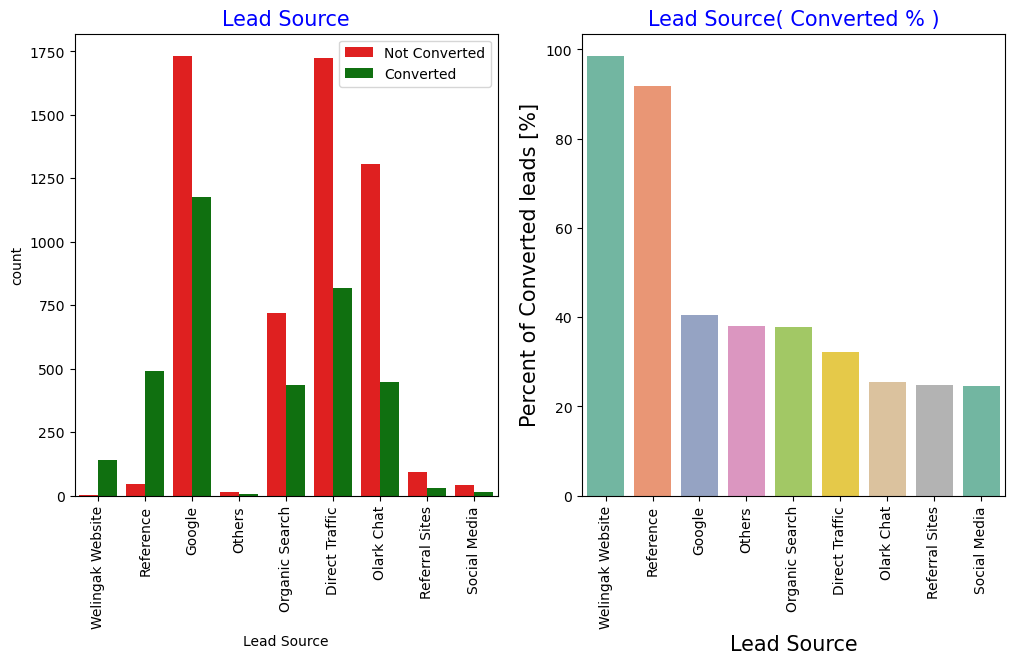

In [67]:
#Run the function to get plot categorical plots
univariate_categorical("Lead Source",label_rotation=True)

# Do Not Email

   Do Not Email  Total Leads   % Values
0             0         8506  92.056277
1             1          734   7.943723


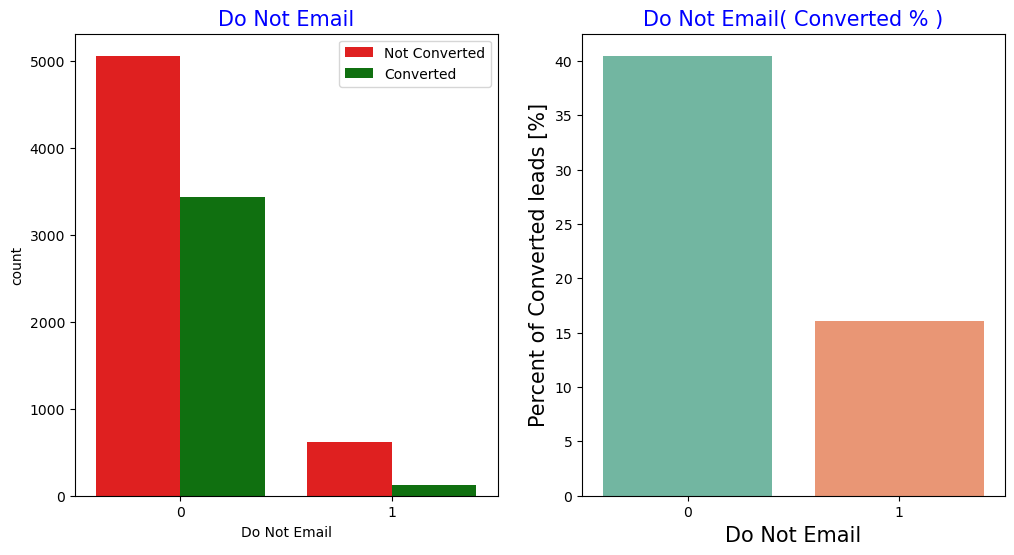

In [69]:
#Run the function to get plot categorical plots
univariate_categorical("Do Not Email")

# Last Activity

               Last Activity  Total Leads   % Values
0               Email Opened         3540  38.311688
1                   SMS Sent         2745  29.707792
2    Olark Chat Conversation          973  10.530303
3    Page Visited on Website          640   6.926407
4          Converted to Lead          428   4.632035
5              Email Bounced          326   3.528139
6         Email Link Clicked          267   2.889610
7                 Other_Tags          205   2.218615
8  Form Submitted on Website          116   1.255411


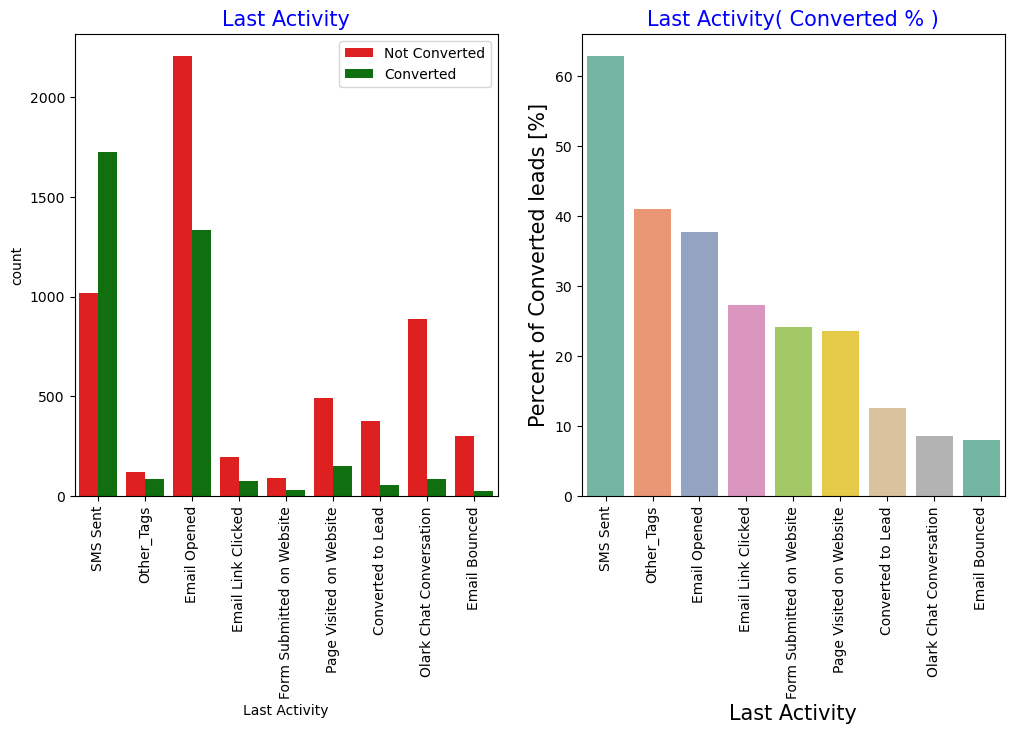

In [70]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

# Last Activity

               Last Activity  Total Leads   % Values
0               Email Opened         3540  38.311688
1                   SMS Sent         2745  29.707792
2    Olark Chat Conversation          973  10.530303
3    Page Visited on Website          640   6.926407
4          Converted to Lead          428   4.632035
5              Email Bounced          326   3.528139
6         Email Link Clicked          267   2.889610
7                 Other_Tags          205   2.218615
8  Form Submitted on Website          116   1.255411


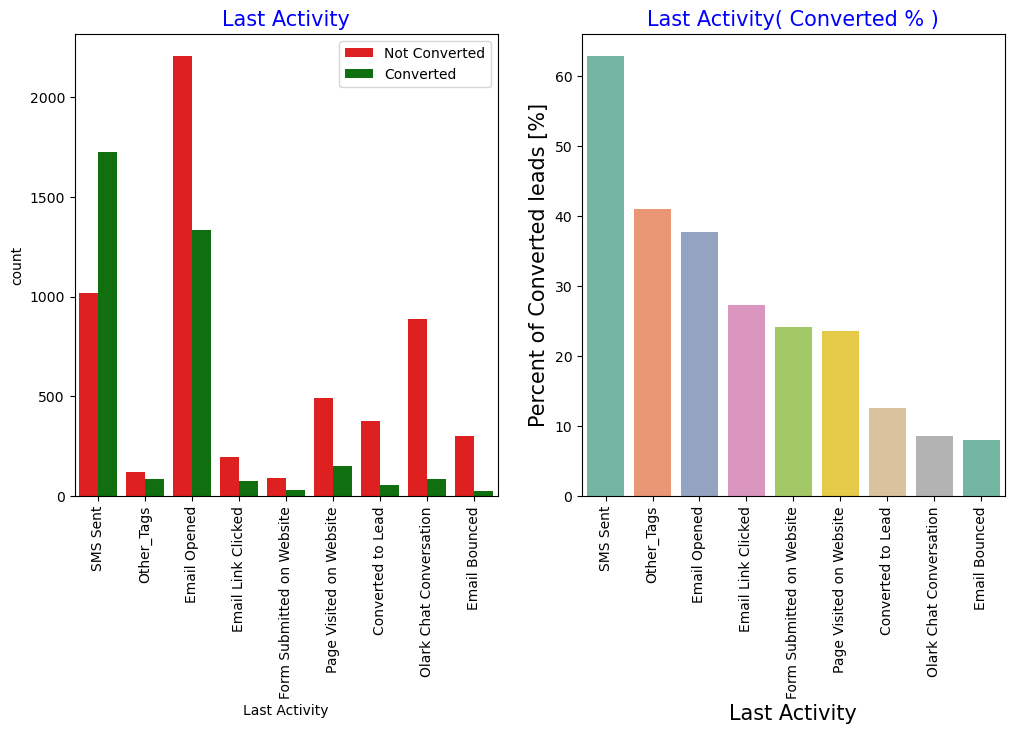

In [71]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

# Specialization

                       Specialization  Total Leads   % Values
0                  Finance Management         4356  47.142857
1           Human Resource Management          848   9.177489
2                Marketing Management          838   9.069264
3               Operations Management          503   5.443723
4             Business Administration          403   4.361472
5              IT Projects Management          366   3.961039
6             Supply Chain Management          349   3.777056
7   Banking, Investment And Insurance          338   3.658009
8               Media and Advertising          203   2.196970
9                  Travel and Tourism          203   2.196970
10             International Business          178   1.926407
11              Healthcare Management          159   1.720779
12             Hospitality Management          114   1.233766
13                         E-COMMERCE          112   1.212121
14                  Retail Management          100   1.082251
15      

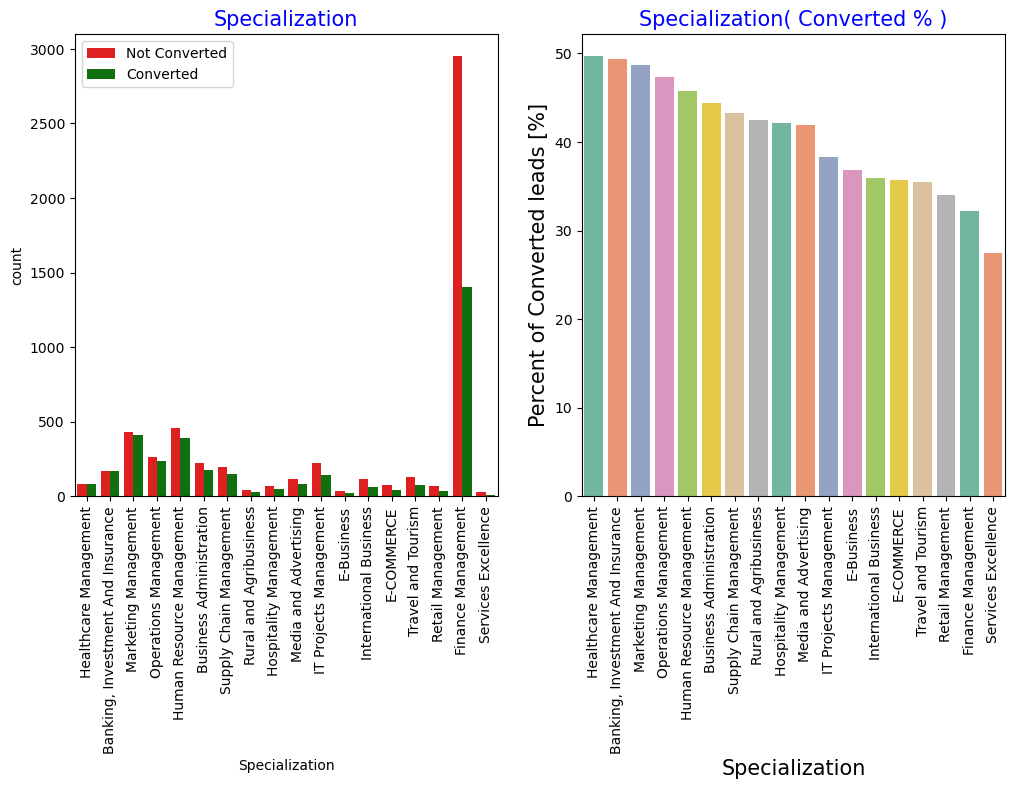

In [72]:
#Run the function to get plot categorical plots
univariate_categorical("Specialization",label_rotation=True)

# Occupation

             Occupation  Total Leads   % Values
0            Unemployed         8290  89.718615
1  Working Professional          706   7.640693
2               Student          210   2.272727
3                 Other           16   0.173160
4             Housewife           10   0.108225
5           Businessman            8   0.086580


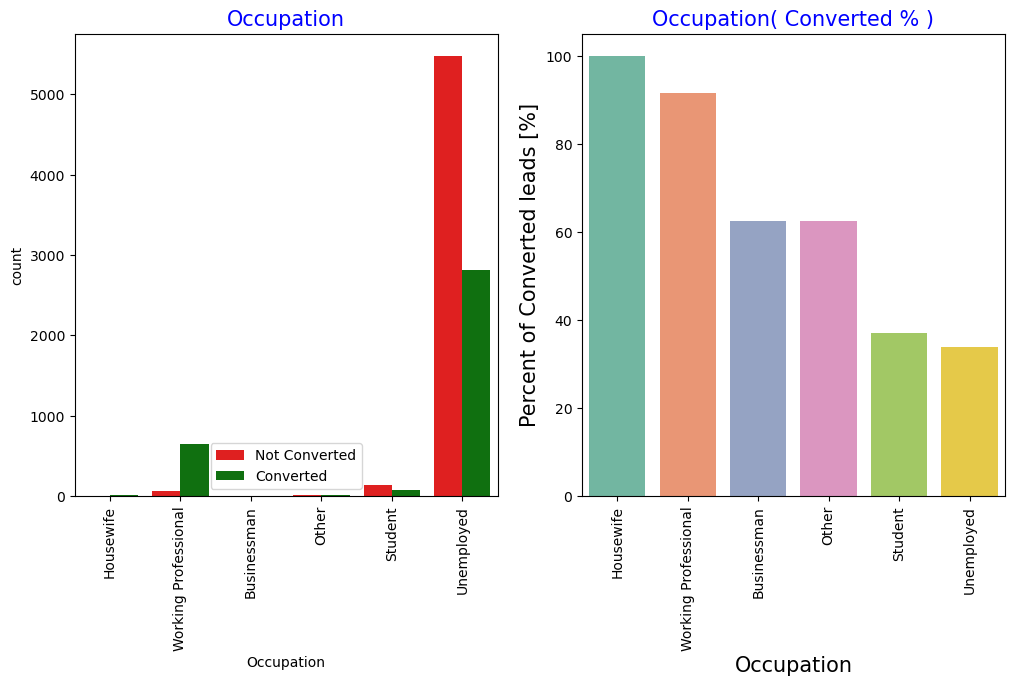

In [73]:
#Run the function to get plot categorical plots
univariate_categorical("Occupation",label_rotation=True)

In [78]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'Occupation', 'Choice of Course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Updates About Course', 'Tags', 'Updateon Supply Chain',
       'Get updates on DM Content', 'City', 'Payment through Cheque',
       'Copy of Mastering Interview', 'Last Notable Activity'],
      dtype='object')

In [80]:
def pieplot(col):
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    converted = df[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['blue','green'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(col)

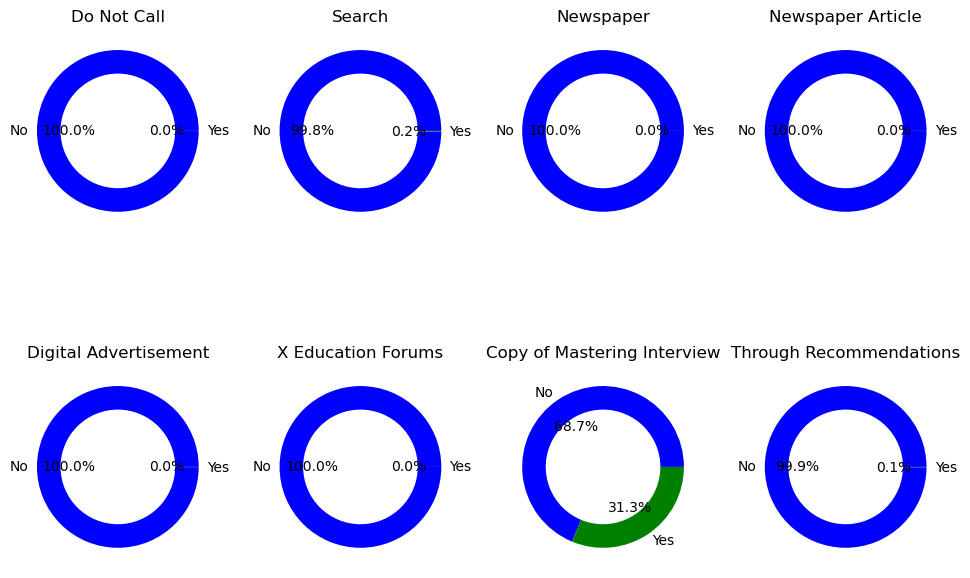

In [81]:
# Lets lookinto the data distribution of the following columns
col = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Copy of Mastering Interview','Through Recommendations']
plt.figure(figsize = (12,8))
i=1
for each_col in col:
    plt.subplot(2,4,i)
    pieplot(each_col)
    i+=1

   Copy of Mastering Interview  Total Leads   % Values
0                            0         6352  68.744589
1                            1         2888  31.255411


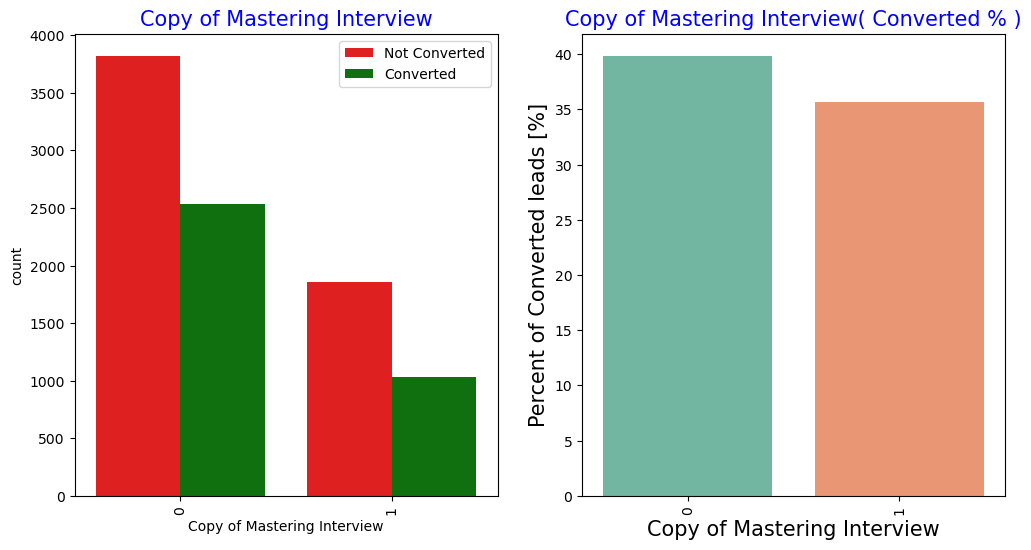

In [83]:
#Run the function to get plot categorical plots
univariate_categorical("Copy of Mastering Interview",label_rotation=True)

# Univariate Analysis

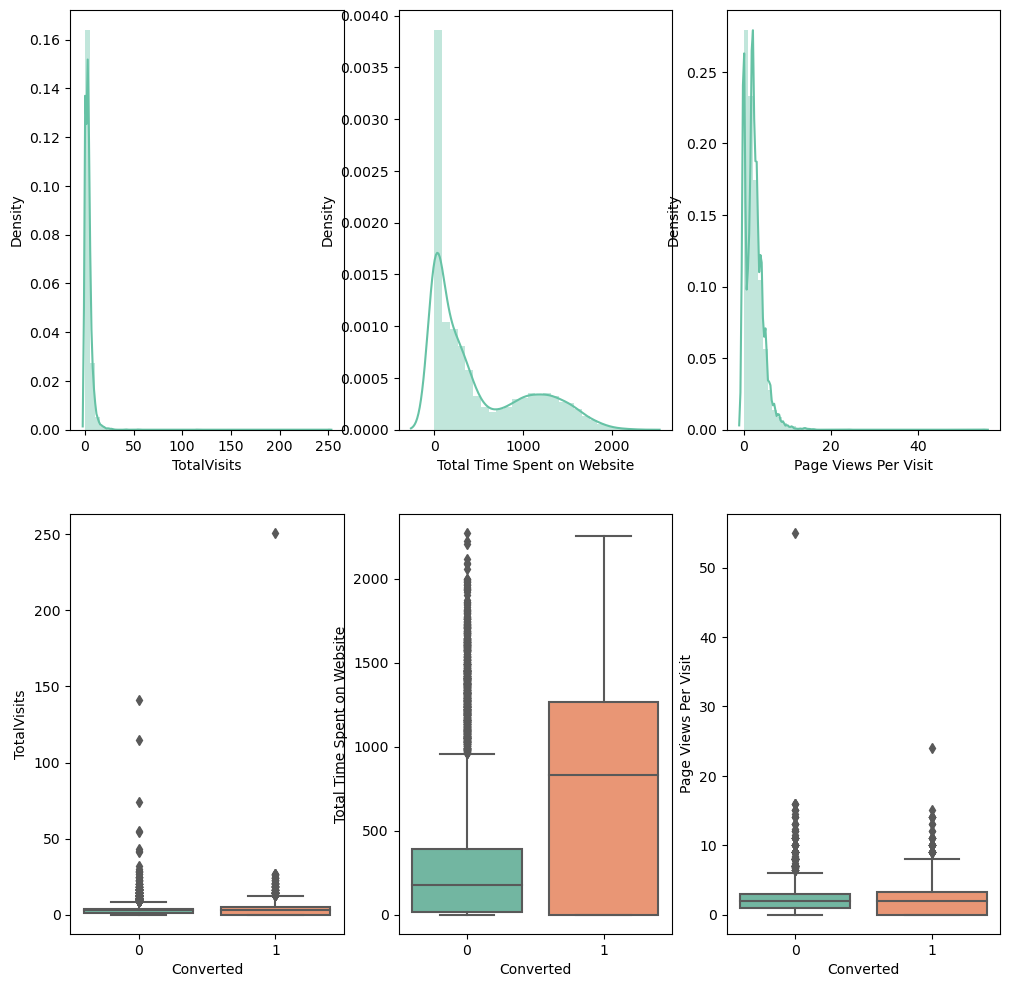

In [84]:
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(df[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=df[col], x = df['Converted'])
    i+=1

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Do Not Call                  9240 non-null   int64  
 4   Converted                    9240 non-null   int64  
 5   TotalVisits                  9240 non-null   float64
 6   Total Time Spent on Website  9240 non-null   float64
 7   Page Views Per Visit         9240 non-null   float64
 8   Last Activity                9240 non-null   object 
 9   Country                      9240 non-null   object 
 10  Specialization               9240 non-null   object 
 11  Occupation                   9240 non-null   object 
 12  Choice of Course             9240 non-null   object 
 13  Search            

# Bivariate Analysis

<Figure size 1000x1000 with 0 Axes>

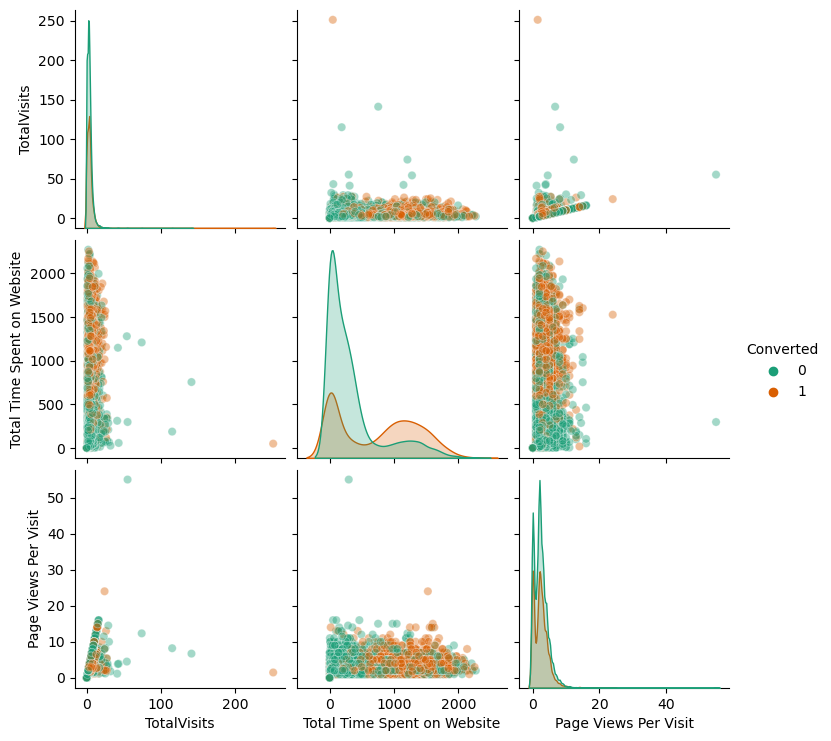

In [86]:
numerical_col = ['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize =(10,10))
sns.pairplot(df[numerical_col],hue="Converted",kind='scatter', plot_kws={'alpha':0.4},palette = 'Dark2')                                  
plt.show()

In [87]:
#Checking the detailed percentile values
df.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

Do Not Email  Do Not Call    Converted  TotalVisits  \
count   9240.000000  9240.000000  9240.000000  9240.000000   
mean       0.079437     0.000216     0.385390     3.445238   
std        0.270435     0.014711     0.486714     4.818723   
min        0.000000     0.000000     0.000000     0.000000   
10%        0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     1.000000   
50%        0.000000     0.000000     0.000000     3.000000   
75%        0.000000     0.000000     1.000000     5.000000   
90%        0.000000     0.000000     1.000000     7.000000   
95%        1.000000     0.000000     1.000000    10.000000   
99%        1.000000     0.000000     1.000000    17.000000   
max        1.000000     1.000000     1.000000   251.000000   

       Total Time Spent on Website  Page Views Per Visit       Search  \
count                  9240.000000           9240.000000  9240.000000   
mean                    487.698268              2.362820     0.001515   
std                     548.021466              2.145333     0.038898   
min                       0.000000              0.000000     0.000000   
10%                       0.000000              0.000000     0.000000   
25%                      12.000000              1.000000     0.000000   
50%                     248.000000              2.000000     0.000000   
75%                     936.000000              3.000000     0.000000   
90%                    1380.000000              5.000000     0.000000   
95%                    1562.000000              6.000000     0.000000   
99%                    1840.610000              9.000000     0.000000   
max                    2272.000000             55.000000     1.000000   

       Magazine  Newspaper Article  X Education Forums    Newspaper  \
count    9240.0        9240.000000         9240.000000  9240.000000   
mean        0.0           0.000216            0.000108     0.000108   
std         0.0           0.014711            0.010403     0.010403   
min         0.0           0.000000            0.000000     0.000000   
10%         0.0           0.000000            0.000000     0.000000   
25%         0.0           0.000000            0.000000     0.000000   
50%         0.0           0.000000            0.000000     0.000000   
75%         0.0           0.000000            0.000000     0.000000   
90%         0.0           0.000000            0.000000     0.000000   
95%         0.0           0.000000            0.000000     0.000000   
99%         0.0           0.000000            0.000000     0.000000   
max         0.0           1.000000            1.000000     1.000000   

       Digital Advertisement  Through Recommendations  Updates About Course  \
count            9240.000000              9240.000000                9240.0   
mean                0.000433                 0.000758                   0.0   
std                 0.020803                 0.027515                   0.0   
min                 0.000000                 0.000000                   0.0   
10%                 0.000000                 0.000000                   0.0   
25%                 0.000000                 0.000000                   0.0   
50%                 0.000000                 0.000000                   0.0   
75%                 0.000000                 0.000000                   0.0   
90%                 0.000000                 0.000000                   0.0   
95%                 0.000000                 0.000000                   0.0   
99%                 0.000000                 0.000000                   0.0   
max                 1.000000                 1.000000                   0.0   

       Updateon Supply Chain  Get updates on DM Content  \
count                 9240.0                     9240.0   
mean                     0.0                        0.0   
std                      0.0                        0.0   
min                      0.0                        0.0   
10%

In [88]:
numerical_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

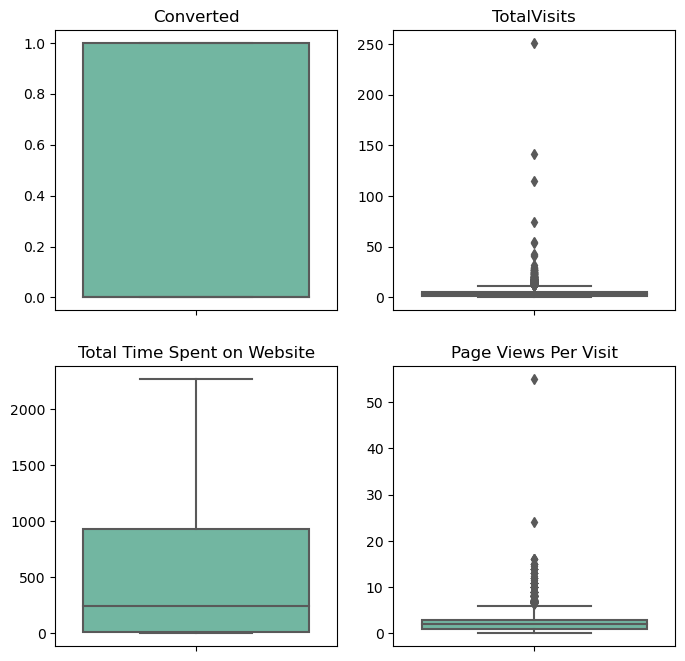

In [89]:
# plotting the numerical column for outlire values.
i=1
plt.figure(figsize=[8,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

Outliers have a large effect on logistic regression. Hence, for the following reasons, let's limit TotalVisits and Page Views Per Visit to the 95th percentile. The amount of data sets is rather large. Because the 95th and 99th percentiles of these columns are so close, the impact of capping to the 95th or 99th percentile will be the same.

In [90]:
#Capping the data at 95% percetile value
Q4 = df['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(df[df['TotalVisits'] >= Q4]))
df.loc[df['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 # outlier capping

Q4 = df['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(df[df['Page Views Per Visit'] >= Q4]))
df.loc[df['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 # outlier capping

Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


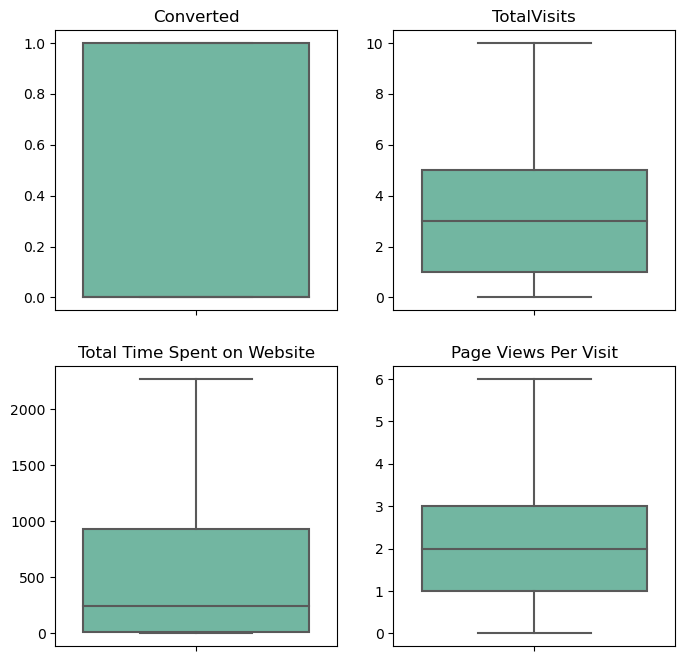

In [91]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[8,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

In [92]:
# Checking the percentile values again 
df.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

Do Not Email  Do Not Call    Converted  TotalVisits  \
count   9240.000000  9240.000000  9240.000000  9240.000000   
mean       0.079437     0.000216     0.385390     3.185822   
std        0.270435     0.014711     0.486714     2.761315   
min        0.000000     0.000000     0.000000     0.000000   
10%        0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     1.000000   
50%        0.000000     0.000000     0.000000     3.000000   
75%        0.000000     0.000000     1.000000     5.000000   
90%        0.000000     0.000000     1.000000     7.000000   
95%        1.000000     0.000000     1.000000    10.000000   
99%        1.000000     0.000000     1.000000    10.000000   
max        1.000000     1.000000     1.000000    10.000000   

       Total Time Spent on Website  Page Views Per Visit       Search  \
count                  9240.000000           9240.000000  9240.000000   
mean                    487.698268              2.260484     0.001515   
std                     548.021466              1.779240     0.038898   
min                       0.000000              0.000000     0.000000   
10%                       0.000000              0.000000     0.000000   
25%                      12.000000              1.000000     0.000000   
50%                     248.000000              2.000000     0.000000   
75%                     936.000000              3.000000     0.000000   
90%                    1380.000000              5.000000     0.000000   
95%                    1562.000000              6.000000     0.000000   
99%                    1840.610000              6.000000     0.000000   
max                    2272.000000              6.000000     1.000000   

       Magazine  Newspaper Article  X Education Forums    Newspaper  \
count    9240.0        9240.000000         9240.000000  9240.000000   
mean        0.0           0.000216            0.000108     0.000108   
std         0.0           0.014711            0.010403     0.010403   
min         0.0           0.000000            0.000000     0.000000   
10%         0.0           0.000000            0.000000     0.000000   
25%         0.0           0.000000            0.000000     0.000000   
50%         0.0           0.000000            0.000000     0.000000   
75%         0.0           0.000000            0.000000     0.000000   
90%         0.0           0.000000            0.000000     0.000000   
95%         0.0           0.000000            0.000000     0.000000   
99%         0.0           0.000000            0.000000     0.000000   
max         0.0           1.000000            1.000000     1.000000   

       Digital Advertisement  Through Recommendations  Updates About Course  \
count            9240.000000              9240.000000                9240.0   
mean                0.000433                 0.000758                   0.0   
std                 0.020803                 0.027515                   0.0   
min                 0.000000                 0.000000                   0.0   
10%                 0.000000                 0.000000                   0.0   
25%                 0.000000                 0.000000                   0.0   
50%                 0.000000                 0.000000                   0.0   
75%                 0.000000                 0.000000                   0.0   
90%                 0.000000                 0.000000                   0.0   
95%                 0.000000                 0.000000                   0.0   
99%                 0.000000                 0.000000                   0.0   
max                 1.000000                 1.000000                   0.0   

       Updateon Supply Chain  Get updates on DM Content  \
count                 9240.0                     9240.0   
mean                     0.0                        0.0   
std                      0.0                        0.0   
min                      0.0                        0.0   
10%

In [93]:
# Checking the unique value counts for categorcial columns
df.nunique().sort_values()

Payment through Cheque            1
Get updates on DM Content         1
Updateon Supply Chain             1
Updates About Course              1
Magazine                          1
Search                            2
Do Not Email                      2
Do Not Call                       2
Converted                         2
Through Recommendations           2
Digital Advertisement             2
Newspaper                         2
X Education Forums                2
Copy of Mastering Interview       2
Newspaper Article                 2
Choice of Course                  3
Lead Origin                       5
City                              6
Occupation                        6
Tags                              7
Last Notable Activity             7
Last Activity                     9
Lead Source                       9
TotalVisits                      12
Specialization                   18
Country                          38
Page Views Per Visit             92
Total Time Spent on Website 

In [94]:
# Checking the categorical values for 'Do Not Email' feature
df['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [95]:
# Listing the categorical variables yet to be encoded
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Lead Origin            9240 non-null   object
 1   Lead Source            9240 non-null   object
 2   Last Activity          9240 non-null   object
 3   Country                9240 non-null   object
 4   Specialization         9240 non-null   object
 5   Occupation             9240 non-null   object
 6   Choice of Course       9240 non-null   object
 7   Tags                   9240 non-null   object
 8   City                   9240 non-null   object
 9   Last Notable Activity  9240 non-null   object
dtypes: object(10)
memory usage: 722.0+ KB


In [96]:
# Checking the labels of the remaining categorical columns

for col in df.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(df[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Lead Source
_________________________________________________________________________________________________
Google              0.314827
Direct Traffic      0.275216
Olark Chat          0.189935
Organic Search      0.124892
Reference           0.057792
Welingak Website    0.015368
Referral Sites      0.013528
Social Media        0.006169
Others              0.002273
Name: Lead Source, dtype: float64
_________________________________________________________________________________________________
Last Activity
_________________________________________________________________________________________________
Email Opened                 0.383117
SMS Sent                     0.297078
Olark Chat Conversation      0.105303
Page Visited on Website      0.069264
Converted to Lead            0.046320
Email Bounced                0.035281
Email Link Clicked           0.028896
Other_Tags                   0.022186
Form Submitted on Website    0.012554
Name: Last Activity, dtype: float64
_______

In [97]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

df.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                          0.0                   0.0   
1          0          5.0                        674.0                   2.5   
2          1          2.0                       1532.0                   2.0   
3          0          1.0                        305.0                   1.0   
4          1          2.0                       1428.0                   1.0   

             Last Activity Country           Specialization  Occupation  \
0  Page Visited on Website   India       Finance Management  Unemployed   
1             Email Opened   India       Finance Management  Unemployed   
2             Email Opened   India  Business Administration     Student   
3               Other_Tags   India    Media and Advertising  Unemployed   
4        Converted to Lead   India       Finance Management  Unemployed   

          Choice of Course  Search  Magazine  Newspaper Article  \
0  Better Career Prospects       0         0                  0   
1  Better Career Prospects       0         0                  0   
2  Better Career Prospects       0         0                  0   
3  Better Career Prospects       0         0                  0   
4  Better Career Prospects       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  Updates About Course  \
0                        0                     0   
1                        0                     0   
2                        0                     0   
3                        0                     0   
4                        0                     0   

                                  Tags  Updateon Supply Chain  \
0          Interested in other courses                      0   
1                              Ringing                      0   
2  Will revert after reading the email                      0   
3                              Ringing                      0   
4  Will revert after reading the email                      0   

   Get updates on DM Content    City  Payment through Cheque  \
0                          0  Mumbai                       0   
1                          0  Mumbai                       0   
2                          0  Mumbai                       0   
3                          0  Mumbai                       0   
4                          0  Mumbai                       0   

   Copy of Mastering Interview Last Notable Activity  \
0                            0              Modified   
1                            0          Email Opened   
2                            1          Email Opened   
3                            0              Modified   
4                            0              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 70 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   int64  
 3   Do Not Call                               9240 non-null   int64  
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   float64
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Country                                   9240 non-null   object 
 10  Specialization                      

In [99]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Do Not Call                               9240 non-null   int64  
 2   Converted                                 9240 non-null   int64  
 3   TotalVisits                               9240 non-null   float64
 4   Total Time Spent on Website               9240 non-null   float64
 5   Page Views Per Visit                      9240 non-null   float64
 6   Country                                   9240 non-null   object 
 7   Choice of Course                          9240 non-null   object 
 8   Search                                    9240 non-null   int64  
 9   Magazine                                  9240 non-null   int64  
 10  Newspaper Article                   

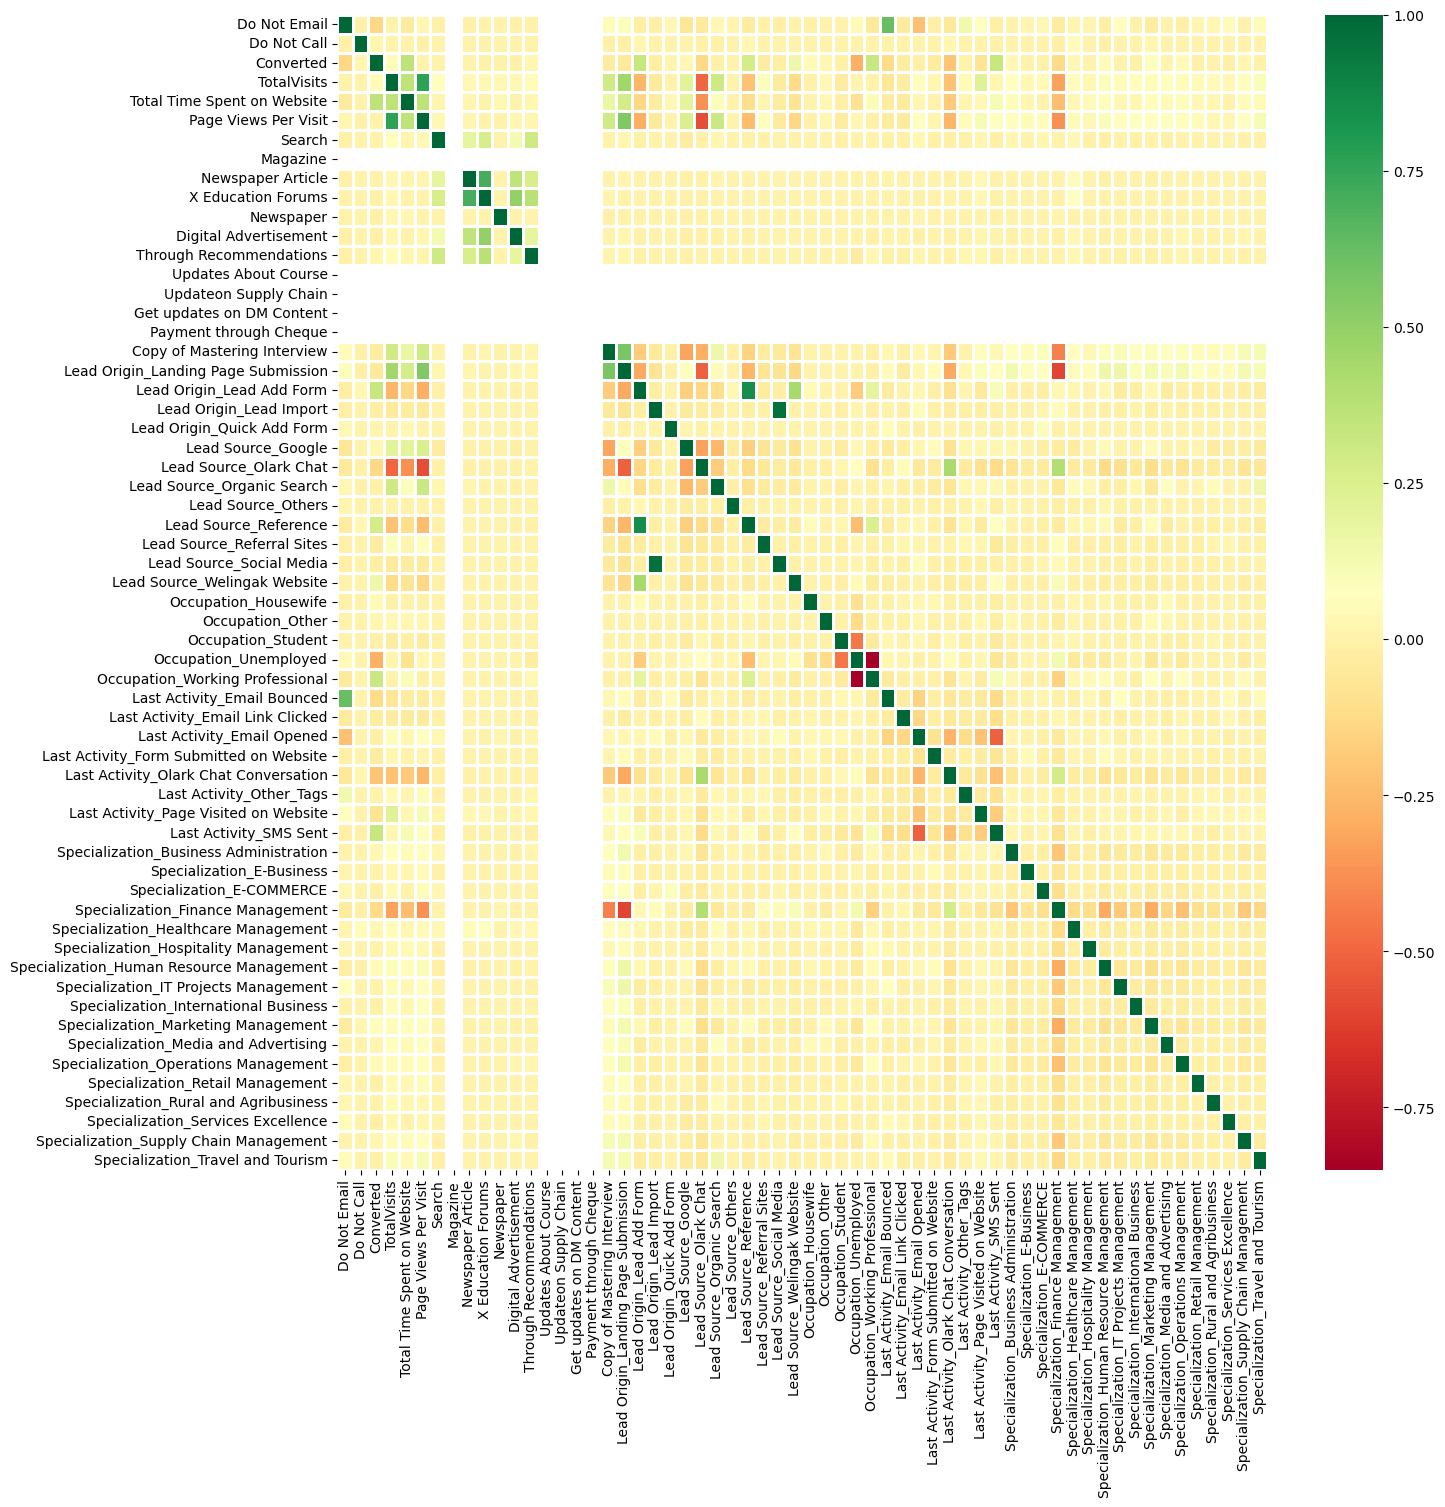

In [100]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(df.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

Here we can see that columns "Magazine", "Updates About Course", "Updateon Supply Chain", "Get updates on DM Content", "Payment through Cheque" are not adding any inputs to the data set. Hence droping the mentioned columns.

In [101]:
#extracting and dropping the highly skewed data columns

cols_dropped = ['Magazine', 'Updates About Course', 'Updateon Supply Chain', 'Get updates on DM Content', 
                'Payment through Cheque']

In [102]:
df = df.drop(cols_dropped, 1)

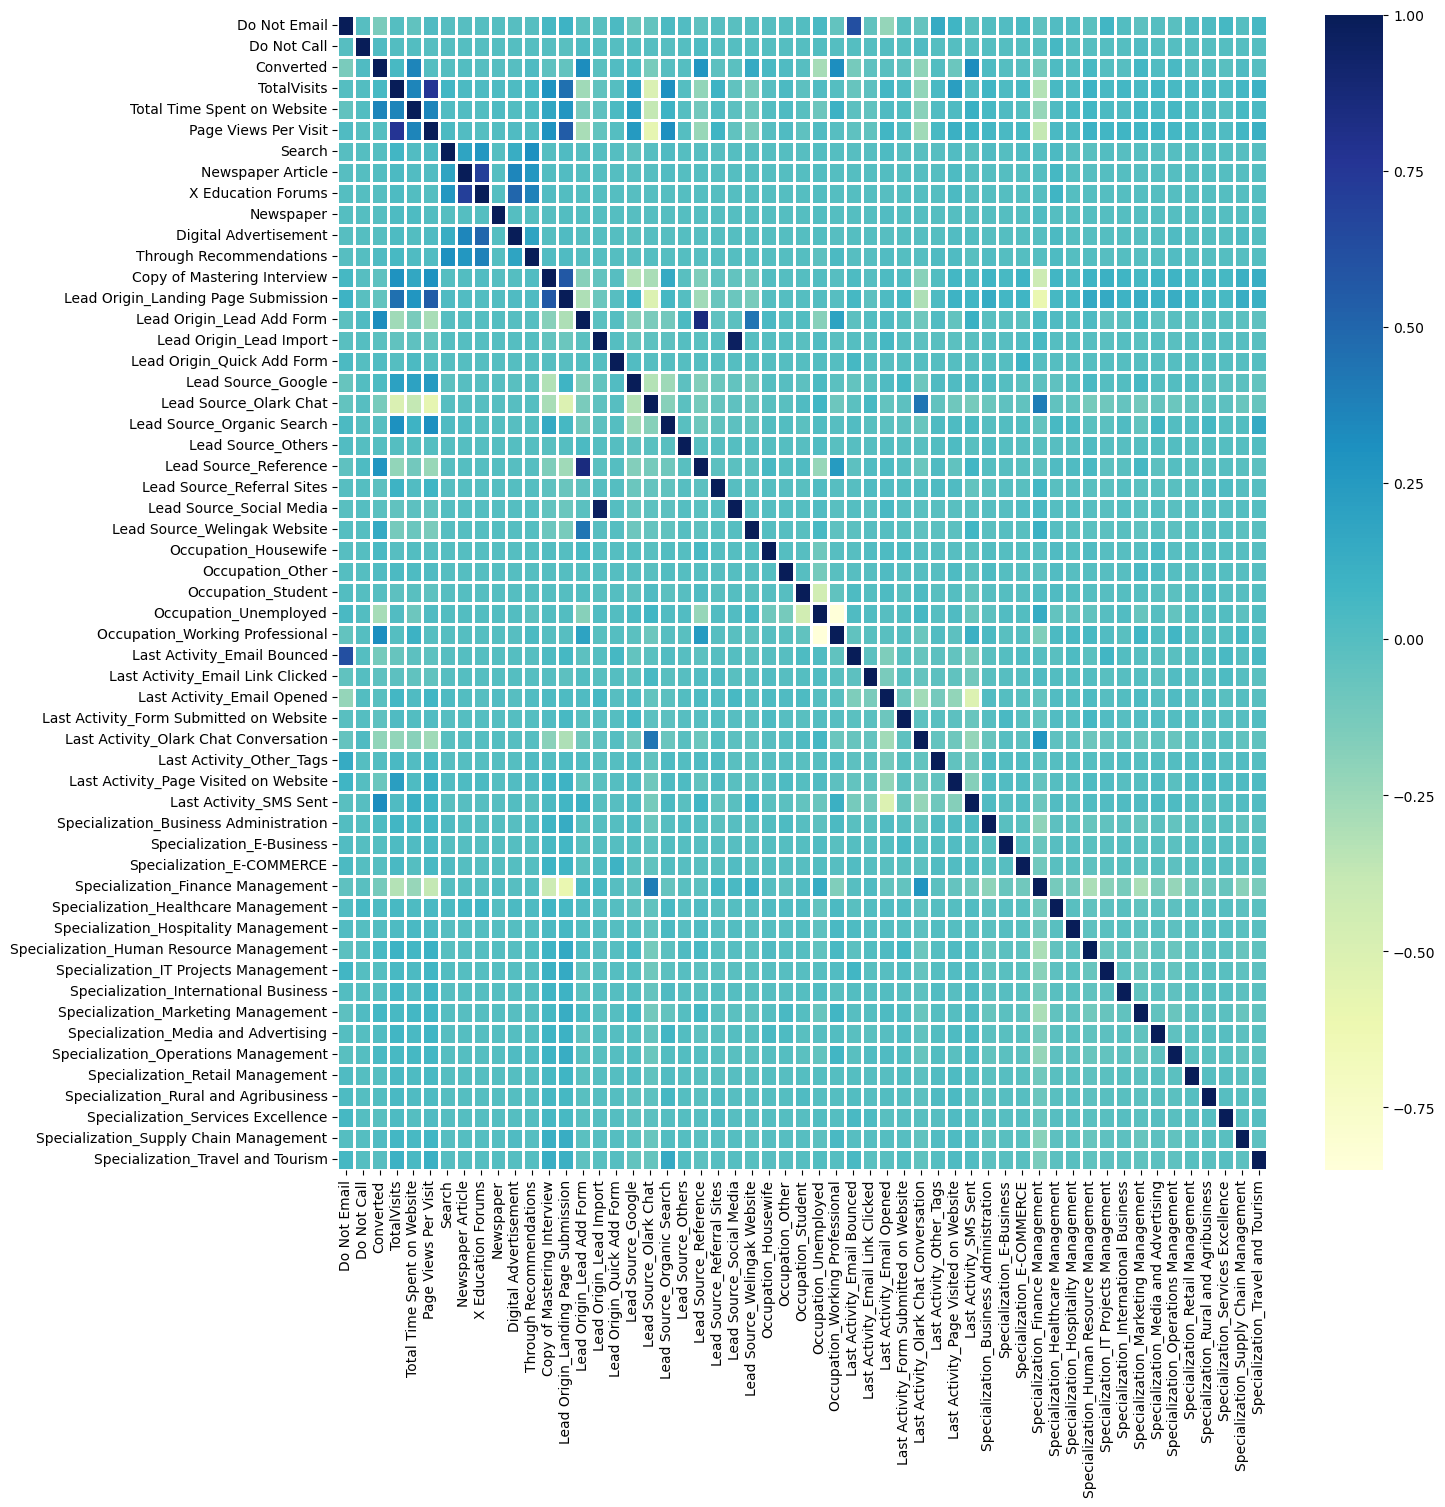

In [103]:
# Visualizing the data using heatmap after droping the unwanted columns
plt.figure(figsize=[15,15])
sns.heatmap(df.corr(), cmap="YlGnBu",linewidth =1)
plt.show()

In [104]:
#extracting and dropping the highly skewed data columns from the graph

cols_dropped = ['Country', 'Choice of Course', 'Search', 'Newspaper Article', 
                     'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Do Not Call']

In [105]:
df = df.drop(cols_dropped, 1)

In [106]:
print('Total number of columns after One-Hot Encoding : ',len(df.columns))

Total number of columns after One-Hot Encoding :  51


Heatmap has 60 columns, making it tough to read. Let's take top 5 positively and adversely associated columns.

In [107]:
corr_lead = df.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

VAR1                         VAR2  \
776              Lead Source_Social Media      Lead Origin_Lead Import   
679                 Lead Source_Reference    Lead Origin_Lead Add Form   
194                  Page Views Per Visit                  TotalVisits   
1104          Last Activity_Email Bounced                 Do Not Email   
293   Lead Origin_Landing Page Submission  Copy of Mastering Interview   

      Correlation  
776      0.964224  
679      0.853237  
194      0.767599  
1104     0.618470  
293      0.569633

In [108]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

VAR1                                 VAR2  \
1077    Occupation_Working Professional                Occupation_Unemployed   
1638  Specialization_Finance Management  Lead Origin_Landing Page Submission   
532              Lead Source_Olark Chat                 Page Views Per Visit   
534              Lead Source_Olark Chat  Lead Origin_Landing Page Submission   
1465             Last Activity_SMS Sent           Last Activity_Email Opened   

      Correlation  
1077    -0.849653  
1638    -0.599114  
532     -0.574760  
534     -0.512950  
1465    -0.512325

In [109]:
#Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

# TRAIN, TEST & SPLIT

In [110]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split

In [111]:
# target variable
Y = df['Converted']
X = df.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [112]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 50)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 50)
 Shape of y_test is  :  (2772,)


In [113]:
#scaling in input variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -1.152121                    -0.885371   
6795             0     0.297240                     0.005716   
3516             0     0.659580                    -0.691418   
8105             0     0.659580                     1.365219   
3934             0    -1.152121                    -0.885371   

      Page Views Per Visit  Tags  City  Copy of Mastering Interview  \
1871             -1.269958     5     0                            0   
6795             -0.519633     6     1                            1   
3516              0.140427     5     0                            0   
8105              1.550812     5     0                            0   
3934             -1.269958     6     0                            0   

      Last Notable Activity  Lead Origin_Landing Page Submission  \
1871                      1                                    0   
6795                      1                                    1   
3516                      1                                    0   
8105                      6                                    1   
3934                      2                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Google  Lead Source_Olark Chat  \
1871                           0                   0                       1   
6795                           0                   0                       0   
3516                           0                   0                       1   
8105                           0                   1                       0   
3934                           0                   0                       1   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1871                           0                   0                      0   
6795                           0                   0                      0   
3516                           0                   0                      0   
8105                           0                   0                      0   
3934                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
1871                           0                         0   
6795                           0                         0   
3516                           0                         0   
8105                           0                         0   
3934                           0                         0   

      Lead Source_Welingak Website  Occupation_Housewife  Occupation_Other  \
1871                             0                     0                 0   
6795                             0                     0                 0   
3516                             0                     0                 0   
8105                             0                     0                 0   
3934                             0                     0                 0   

      Occupation_Student  Occupation_Unemployed  \
1871                   0                      1   
6795                   0                      1   
3516                   0                      1   
8105                   0                      1   
3934                   0                      1   

      Occupation_Working Professional  Last Activity_Email Bounced  \
1871                                0                            0   
6795                                0                            0   
3516                                0                            0   
8105                                0  

We have  Train and Test databases available and the Train dataset has been standardised, let's attempt developing a model with Logistic Regression.

In [114]:
### Checking the Conversion Rate

print("Conversion rate is ", (sum(df['Converted'])/len(df['Converted'].index))*100)

Conversion rate is  38.53896103896104


In [115]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = df.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import      Lead Source_Social Media                 0.964224
Lead Origin_Lead Add Form    Lead Source_Reference                    0.853237
Last Notable Activity        Last Activity_SMS Sent                   0.786351
TotalVisits                  Page Views Per Visit                     0.767599
Do Not Email                 Last Activity_Email Bounced              0.618470
Copy of Mastering Interview  Lead Origin_Landing Page Submission      0.569633
Page Views Per Visit         Lead Origin_Landing Page Submission      0.550292
TotalVisits                  Lead Origin_Landing Page Submission      0.450953
Lead Origin_Lead Add Form    Lead Source_Welingak Website             0.430407
Lead Source_Olark Chat       Last Activity_Olark Chat Conversation    0.426248
dtype: float64

In [116]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Social Media','Lead Source_Reference','Last Activity_SMS Sent',
                      'Page Views Per Visit','Last Activity_Email Bounced','Lead Origin_Landing Page Submission','Lead Origin_Landing Page Submission',
                      'Lead Origin_Landing Page Submission','Lead Origin_Landing Page Submission','Lead Source_Welingak Website','Last Activity_Olark Chat Conversation'], 1)

X_train = X_train.drop(['Lead Source_Social Media','Lead Source_Reference','Last Activity_SMS Sent',
                      'Page Views Per Visit','Last Activity_Email Bounced','Lead Origin_Landing Page Submission','Lead Origin_Landing Page Submission',
                      'Lead Origin_Landing Page Submission','Lead Origin_Landing Page Submission','Lead Source_Welingak Website','Last Activity_Olark Chat Conversation'], 1)

In [117]:
conv_corr = X_train.corr()

In [118]:

conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Source_Olark Chat       Specialization_Finance Management        0.398715
TotalVisits                  Total Time Spent on Website              0.345935
                             Lead Source_Organic Search               0.296993
                             Copy of Mastering Interview              0.296474
                             Last Activity_Page Visited on Website    0.232968
City                         Copy of Mastering Interview              0.212026
TotalVisits                  Lead Source_Google                       0.208499
Total Time Spent on Website  Lead Source_Google                       0.204431
Lead Origin_Lead Add Form    Occupation_Working Professional          0.194645
TotalVisits                  City                                     0.161322
dtype: float64

# Model building

In [119]:
# Logistic regression model
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.5
Date:                Tue, 14 Mar 2023   Deviance:                       5392.9
Time:                        03:27:06   Pearson chi2:                 9.74e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3908
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6836      1.172     -3.142      0.002      -5.982      -1.386
Do Not Email                                -1.3723      0.175     -7.835      0.000      -1.716      -1.029
TotalVisits                                  0.2008      0.046      4.328      0.000       0.110       0.292
Total Time Spent on Website                  1.0753      0.040     26.940      0.000       0.997       1.153
Tags                                         0.1605      0.023      6.917      0.000       0.115       0.206
City                                         0.0272      0.028      0.984      0.325      -0.027       0.081
Copy of Mastering Interview                 -0.1646      0.104     -1.582      0.114      -0.368       0.039
Last Notable Activity                        0.4795      0.025     19.062      0.000       0.430       0.529
Lead Origin_Lead Add Form                    4.5345      0.212     21.410      0.000       4.119       4.950
Lead Origin_Lead Import                      0.1706      0.550      0.310      0.756      -0.907       1.248
Lead Origin_Quick Add Form                  21.7180   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                           0.2735      0.111      2.473      0.013       0.057       0.490
Lead Source_Olark Chat                       1.3454      0.143      9.379      0.000       1.064       1.627
Lead Source_Organic Search                   0.0809      0.127      0.638      0.523      -0.167       0.329
Lead Source_Others                          -0.1201      0.738     -0.163      0.871      -1.566       1.326
Lead Source_Referral Sites                  -0.0266      0.316     -0.084      0.933      -0.646       0.593
Occupation_Housewife                        23.1503   1.33e+04      0.002      0.999   -2.61e+04    2.62e+04
Occupation_Other                             0.4635      1.415      0.327      0.743      -2.311       3.237
Occupation_Student                           0.4999      1.168      0.428      0.669      -1.789       2.789
Occupation_Unemployed                        0.1084      1.143      0.095      0.924      -2.132       2.349
Occupation_Working Professional              2.8579      1.158      2.469      0.014       0.589       5.127
Last Activity_Email Link Clicked             0.7581      0.239      3.178      0.001       0.291       1.226
Last Activity_Email Opened                   1.0174      0.110      9.228      0.000       0.801       1.234
Last Activity_Form Submitted on Website     -0.1073      0.347     -0.309      0.757      -0.788       0.574
Last Activity_Other_Tags                     0.7897      0.244      3.240      0.001       0.312       1.267
Last Activity_Page Visited on W

# Feature Selection - RFE

In [120]:
# Starting with 15 features selected by RFE
# We will then optimize the model further by inspecting VIF and p-value of the features

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Tags', False, 6),
 ('City', False, 20),
 ('Copy of Mastering Interview', False, 4),
 ('Last Notable Activity', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Origin_Quick Add Form', False, 7),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Others', False, 13),
 ('Lead Source_Referral Sites', False, 21),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', True, 1),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Other_Tags', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Specialization_Business Admi

In [121]:
col = X_train.columns[rfe.support_]

# Models with Stat Models

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2737.8
Date:                Tue, 14 Mar 2023   Deviance:                       5475.6
Time:                        03:27:07   Pearson chi2:                 8.71e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3829
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.8741      1.139     -2.523      0.012      -5.106      -0.642
Do Not Email                             -1.3137      0.170     -7.706      0.000      -1.648      -0.980
Total Time Spent on Website               1.0851      0.039     27.582      0.000       1.008       1.162
Last Notable Activity                     0.4960      0.024     20.334      0.000       0.448       0.544
Lead Origin_Lead Add Form                 4.1919      0.188     22.272      0.000       3.823       4.561
Lead Source_Google                        0.3225      0.079      4.090      0.000       0.168       0.477
Lead Source_Olark Chat                    1.1882      0.112     10.602      0.000       0.969       1.408
Occupation_Housewife                     22.7611   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
Occupation_Other                          0.3655      1.392      0.263      0.793      -2.364       3.095
Occupation_Student                        0.2569      1.156      0.222      0.824      -2.009       2.523
Occupation_Unemployed                    -0.0730      1.133     -0.064      0.949      -2.294       2.148
Occupation_Working Professional           2.6698      1.148      2.326      0.020       0.421       4.919
Last Activity_Email Link Clicked          0.7331      0.239      3.062      0.002       0.264       1.202
Last Activity_Email Opened                1.0775      0.106     10.148      0.000       0.869       1.286
Last Activity_Other_Tags                  0.8193      0.239      3.423      0.001       0.350       1.288
Last Activity_Page Visited on Website    -0.7265      0.149     -4.863      0.000      -1.019      -0.434
Specialization_Finance Management        -0.3170      0.078     -4.085      0.000      -0.469      -0.165
Specialization_Hospitality Management    -1.0958      0.333     -3.292      0.001      -1.748      -0.443
Specialization_International Business    -0.4174      0.253     -1.649      0.099      -0.914       0.079
Specialization_Retail Management         -0.4693      0.334     -1.406      0.160      -1.123       0.185
Specialization_Rural and Agribusiness     0.6028      0.384      1.568      0.117      -0.151       1.356
=========================================================================================================
"""

In [123]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.241189
6795    0.156510
3516    0.222235
8105    0.862078
3934    0.275443
4844    0.991781
3297    0.173250
8071    0.995991
987     0.165939
7423    0.898151
dtype: float64

In [124]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24118933, 0.15651046, 0.22223504, 0.86207825, 0.27544278,
       0.99178069, 0.17325028, 0.9959911 , 0.1659392 , 0.89815064])

In [125]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID
0        0      0.241189     1871
1        0      0.156510     6795
2        0      0.222235     3516
3        0      0.862078     8105
4        0      0.275443     3934

In [126]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  predicted
0        0      0.241189     1871          0
1        0      0.156510     6795          0
2        0      0.222235     3516          0
3        0      0.862078     8105          1
4        0      0.275443     3934          0

# Checking VIF

In [127]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                 Features  Variance Inflation Factor
9                   Occupation_Unemployed                      11.88
2                   Last Notable Activity                       5.76
12             Last Activity_Email Opened                       3.40
15      Specialization_Finance Management                       2.51
10        Occupation_Working Professional                       2.08
5                  Lead Source_Olark Chat                       2.00
4                      Lead Source_Google                       1.82
3               Lead Origin_Lead Add Form                       1.32
8                      Occupation_Student                       1.26
1             Total Time Spent on Website                       1.26
11       Last Activity_Email Link Clicked                       1.21
0                            Do Not Email                       1.21
14  Last Activity_Page Visited on Website                       1.18
13               Last Activity_Oth

In [128]:
#Dropping Occupation_Housewife due to High P - Value

col = col.drop('Occupation_Housewife')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Last Notable Activity',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Other_Tags', 'Last Activity_Page Visited on Website',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

In [129]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.0
Date:                Tue, 14 Mar 2023   Deviance:                       5482.0
Time:                        03:27:07   Pearson chi2:                 8.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0946      0.761     -1.439      0.150      -2.586       0.397
Do Not Email                             -1.3113      0.170     -7.691      0.000      -1.645      -0.977
Total Time Spent on Website               1.0842      0.039     27.568      0.000       1.007       1.161
Last Notable Activity                     0.4960      0.024     20.342      0.000       0.448       0.544
Lead Origin_Lead Add Form                 4.1915      0.188     22.276      0.000       3.823       4.560
Lead Source_Google                        0.3227      0.079      4.096      0.000       0.168       0.477
Lead Source_Olark Chat                    1.1848      0.112     10.579      0.000       0.965       1.404
Occupation_Other                         -1.4134      1.107     -1.277      0.202      -3.583       0.756
Occupation_Student                       -1.5229      0.788     -1.932      0.053      -3.068       0.022
Occupation_Unemployed                    -1.8526      0.755     -2.455      0.014      -3.332      -0.373
Occupation_Working Professional           0.8897      0.775      1.147      0.251      -0.630       2.410
Last Activity_Email Link Clicked          0.7381      0.239      3.089      0.002       0.270       1.206
Last Activity_Email Opened                1.0810      0.106     10.188      0.000       0.873       1.289
Last Activity_Other_Tags                  0.8133      0.240      3.389      0.001       0.343       1.284
Last Activity_Page Visited on Website    -0.7330      0.149     -4.907      0.000      -1.026      -0.440
Specialization_Finance Management        -0.3178      0.078     -4.099      0.000      -0.470      -0.166
Specialization_Hospitality Management    -1.0962      0.333     -3.294      0.001      -1.748      -0.444
Specialization_International Business    -0.4180      0.253     -1.651      0.099      -0.914       0.078
Specialization_Retail Management         -0.4693      0.334     -1.407      0.160      -1.123       0.185
Specialization_Rural and Agribusiness     0.6023      0.384      1.567      0.117      -0.151       1.355
=========================================================================================================
"""

In [130]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  predicted
0        0      0.241348     1871          0
1        0      0.156850     6795          0
2        0      0.222206     3516          0
3        0      0.861968     8105          1
4        0      0.275458     3934          0

In [131]:
# model evaluation
from sklearn import metrics

# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8101422387136673


The accuracy is still practically the same.

Let's now check the VIFs again

In [132]:
calculate_vif(X_train[col])

                                 Features  Variance Inflation Factor
8                   Occupation_Unemployed                      11.71
2                   Last Notable Activity                       5.71
11             Last Activity_Email Opened                       3.36
14      Specialization_Finance Management                       2.51
9         Occupation_Working Professional                       2.06
5                  Lead Source_Olark Chat                       2.00
4                      Lead Source_Google                       1.82
3               Lead Origin_Lead Add Form                       1.31
7                      Occupation_Student                       1.26
1             Total Time Spent on Website                       1.26
10       Last Activity_Email Link Clicked                       1.21
0                            Do Not Email                       1.20
13  Last Activity_Page Visited on Website                       1.18
12               Last Activity_Oth

In [133]:
# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [134]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8101422387136673


In [135]:
calculate_vif(X_train[col])

                                 Features  Variance Inflation Factor
8                   Occupation_Unemployed                      11.71
2                   Last Notable Activity                       5.71
11             Last Activity_Email Opened                       3.36
14      Specialization_Finance Management                       2.51
9         Occupation_Working Professional                       2.06
5                  Lead Source_Olark Chat                       2.00
4                      Lead Source_Google                       1.82
3               Lead Origin_Lead Add Form                       1.31
7                      Occupation_Student                       1.26
1             Total Time Spent on Website                       1.26
10       Last Activity_Email Link Clicked                       1.21
0                            Do Not Email                       1.20
13  Last Activity_Page Visited on Website                       1.18
12               Last Activity_Oth

All variables have a good value of VIF and p-values. We can proceed with making predictions using this model only

In [136]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [137]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3593  409]
 [ 819 1647]]
Accuracy : 0.8101422387136673
Sensitivity : 0.6678832116788321
Specificity : 0.8978010994502749
Precision : 0.8010700389105059


(0.8101422387136673,
 0.6678832116788321,
 0.8978010994502749,
 0.8010700389105059)

Plotting the ROC Curve

In [138]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [139]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

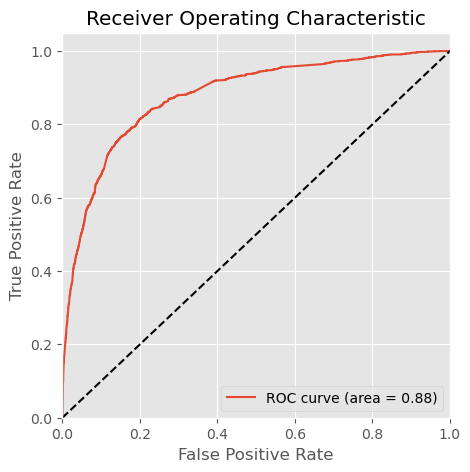

In [140]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

ROC Curve aread is 0.88

# Finding optimal value of the cut off

In [141]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        0      0.241348     1871          0    1    1    1    0    0    0   
1        0      0.156850     6795          0    1    1    0    0    0    0   
2        0      0.222206     3516          0    1    1    1    0    0    0   
3        0      0.861968     8105          1    1    1    1    1    1    1   
4        0      0.275458     3934          0    1    1    1    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    1    0  
4    0    0    0    0

In [142]:
# Calculating accuracy, sensitivity and specificity from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

probability_score  accuracy_score  sensitivity_score  specificity_score  \
0.0                0.0        0.381262           1.000000           0.000000   
0.1                0.1        0.545918           0.973236           0.282609   
0.2                0.2        0.755257           0.883617           0.676162   
0.3                0.3        0.799784           0.830900           0.780610   
0.4                0.4        0.815708           0.767640           0.845327   
0.5                0.5        0.810142           0.667883           0.897801   
0.6                0.6        0.798856           0.593268           0.925537   
0.7                0.7        0.781540           0.510138           0.948776   
0.8                0.8        0.759122           0.415653           0.970765   
0.9                0.9        0.711503           0.263990           0.987256   

     precision_score  
0.0         0.381262  
0.1         0.455322  
0.2         0.627050  
0.3         0.700034  
0.4         0.753583  
0.5         0.801070  
0.6         0.830778  
0.7         0.859877  
0.8         0.897548  
0.9         0.927350

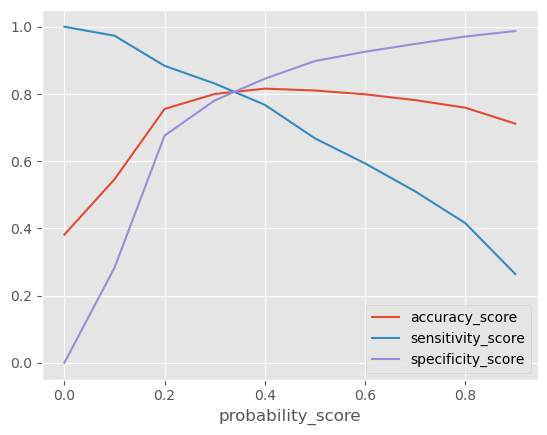

In [143]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

# Precision-Recall Trade off

Next, we'll investigate the Precision-Recall trade-off to determine if balancing these parameters produces better results. Precision indicates how many of all leads forecasted at 1 have actually converted. Recall signifies how many of all leads that converted were accurately identified as 1. This is the same as the sensitivity value.

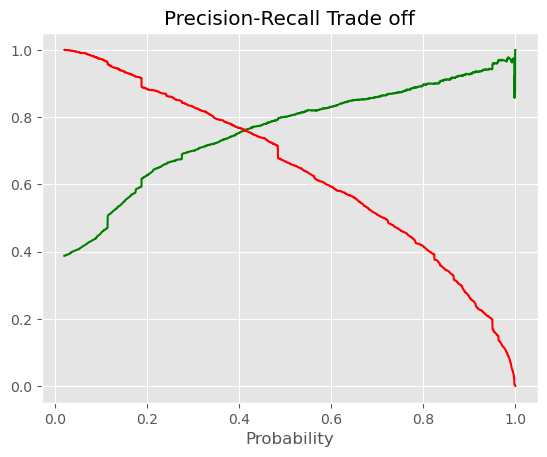

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

In Sensitivity-Specificity-Accuracy plot 0.34 probability looks optimal. In Precision-Recall Curve 0.41 looks optimal.

We are taking 0.37 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [162]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.37 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  Convert_predicted  Lead_Score
0        0      0.241348     1871                  0          24
1        0      0.156850     6795                  0          16
2        0      0.222206     3516                  0          22
3        0      0.861968     8105                  1          86
4        0      0.275458     3934                  0          28

In [163]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[3304  698]
 [ 529 1937]]
Accuracy : 0.8102968460111317
Sensitivity : 0.7854825628548256
Specificity : 0.8255872063968016
Precision : 0.7351043643263757


(0.8102968460111317,
 0.7854825628548256,
 0.8255872063968016,
 0.7351043643263757)

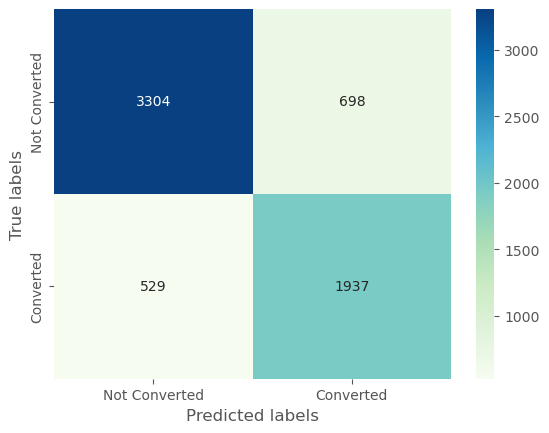

In [164]:
def draw_cm(actual, predicted, cmap):
    cm = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=cmap,
    xticklabels=["Not Converted", "Converted"],
    yticklabels=["Not Converted", "Converted"])
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()

#Plotting the Confusion Matrix
draw_cm(y_train_pred_final['Convert'], y_train_pred_final['Convert_predicted'], "GnBu")

In [166]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.37 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

Converted  Prospect ID  Converting_Probability  final_predicted  Lead_Score
0          1         4269                1.000000                1         100
1          1         2376                0.980210                1          98
2          1         7766                1.000000                1         100
3          0         9199                0.251957                0          25
4          1         4359                0.943815                1          94

In [167]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[3304  698]
 [ 529 1937]]
Accuracy : 0.8102968460111317
Sensitivity : 0.7854825628548256
Specificity : 0.8255872063968016
Precision : 0.7351043643263757


(0.8102968460111317,
 0.7854825628548256,
 0.8255872063968016,
 0.7351043643263757)

Conclusion:

The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

Here, the logistic regression model is used to predict the probabilty of conversion of a customer.

Optimum cut off is chosen to be 0.37 i.e.any lead with greater than 0.37 probability of converting is predicted as Hot Lead and any lead with 0.37 or less probability of converting is predicted as Cold Lead.

The model has Accuracy of 0.81, Sensitivity of 0.78, Specificity of 0.82 & Precision : 0.73.

# THE END